# setup


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd
from sklearn.linear_model import LinearRegression


In [2]:
frame = pd.read_pickle('clean_all.pkl')
df_10 =  pd.read_pickle('ANA_1981-2010_10_raw.pkl') 
df_91 = pd.read_pickle('ANA_1991-2010_10_raw.pkl')
stations = pd.read_csv('stations.csv', index_col=1)
date_range = pd.date_range(start = '1981-01-01', end = '2010-12-01', freq='MS' )
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = gpd.read_file('stations.geojson')


In [3]:
codes_out = df_10[df_10['Date'].dt.day != 1]['Code'].unique()
df_10 = df_10[~df_10.Code.isin(codes_out)]
#df_10 = df_10[~df_10.Code.isin([2550056])] # MUDAR ISSO

gdf_filtered = gdf[(gdf.Code.isin(df_10['Code']))]
gdf_filtered.reset_index(inplace=True, drop=True)
gdf_filtered_dist = gdf_filtered.to_crs('ESRI:102032')
#df_bruto = df_10[df_10['Consistency'] == 1].set_index(['Code','Date']).unstack().stack(dropna=False).reset_index()


# datas fora do padrao

In [13]:
frame[frame['Date'].dt.day != 1].dropna()

Code  Consistency       Date  Total
3088257  2551015            1 2012-03-23    1.0
3088258  2551015            1 2012-02-03    4.0
3088264  2551015            1 2011-04-18   88.0
3088271  2551015            1 2010-07-29    1.0
3088273  2551015            1 2010-05-04   92.0
...          ...          ...        ...    ...
3443719  2852057            2 2013-08-20  172.8
3443777  2852057            2 2008-10-07  282.0
3443780  2852057            2 2008-07-19   37.6
3443809  2852057            2 2006-02-22   38.2
3443817  2852057            2 2005-05-12  357.2

[130 rows x 4 columns]

In [32]:
codes_out_date= frame[frame['Date'].dt.day != 1].dropna().Code.unique()
codes_out_date

array([2551015, 2551063, 2551069, 2552009, 2552030, 2552055, 2552069,
       2751028, 2751031, 2752027, 2851061, 2852057], dtype=int64)

In [30]:
frame[frame['Date'].dt.day != 1].dropna().Code.value_counts()

2551015    20
2551069    17
2552009    14
2851061    13
2852057    13
2552030    12
2751028    12
2551063     9
2751031     8
2552055     6
2752027     4
2552069     2
Name: Code, dtype: int64

In [34]:
df_10[df_10['Date'].dt.day != 1].dropna().Code.value_counts()

2552009    9
2552030    7
Name: Code, dtype: int64

In [33]:
gdf[gdf.Code.isin(codes_out_date)]

Code                                 Name  Latitude  Longitude  \
3464   2552069      UHE SALTO OSÓRIO RIO DAS COBRAS  -25.4103   -52.7400   
3500   2551069              UHE SALTO OSÓRIO PINHÃO  -25.6617   -51.6622   
4084   2552030   UHE SALTO SANTIAGO CHOPINZINHO PLU  -25.8600   -52.5269   
4632   2852057                  UHE PASSO FUNDO PLU  -28.2267   -52.4033   
5747   2751031         UHE MACHADINHO RIO FORQUILHA  -27.8786   -51.7544   
5764   2851061        UHE MACHADINHO LAGOA VERMELHA  -28.2222   -51.5125   
5854   2552009  UHE SALTO OSÓRIO LARANJEIRAS DO SUL  -25.3978   -52.4350   
6007   2552055     UHE SALTO SANTIAGO FOZ DO JORDÃO  -25.7747   -52.1139   
8561   2752027             UHE PASSO FUNDO MONTANTE  -27.9464   -52.5858   
9468   2551015        UHE SALTO SANTIAGO GUARAPUAVA  -25.3656   -51.4956   
9469   2551063           UHE SALTO SANTIAGO GOIOXIM  -25.2406   -51.9275   
17894  2751028               UHE MACHADINHO JUSANTE  -27.5206   -51.8106   

       Altitude                     geometry  
3464      498.0  POINT (-52.74000 -25.41030)  
3500     1070.0  POINT (-51.66220 -25.66170)  
4084      738.0  POINT (-52.52690 -25.86000)  
4632      684.0  POINT (-52.40330 -28.22670)  
5747      579.0  POINT (-51.75440 -27.87860)  
5764      805.0  POINT (-51.51250 -28.22220)  
5854      810.0  POINT (-52.43500 -25.39780)  
6007      615.0  POINT (-52.11390 -25.77470)  
8561      599.0  POINT (-52.58580 -27.94640)  
9468     1051.0  POINT (-51.49560 -25.36560)  
9469      917.0  POINT (-51.92750 -25.24060)  
17894     372.0  POINT (-51.81060 -27.52060)

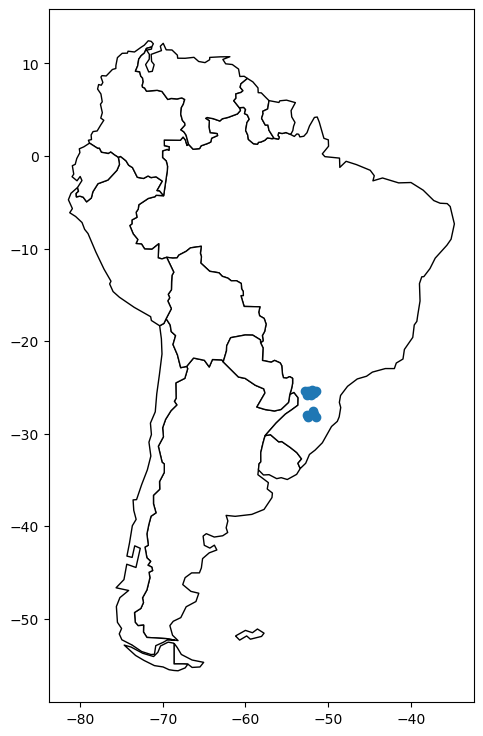

In [23]:
fig, ax = plt.subplots( figsize=(16, 9))
# We restrict to South America.
world[world.continent == 'South America'].plot(ax = ax,
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf[gdf.Code.isin(codes_out_date)].plot(ax=ax)
#gdf_dates.plot(ax=ax, color='blue', markersize=0.1, label='Filtrados por Data', marker= '.')


plt.show()

possibilidades: 
- excluir as estações
- só os dados que nao se adequam e passar filtro de NA
- função que arruma a data(ver se tem a data antes ou dps com medida certa.)


# duplicated stations

In [14]:
gdf_duplicated = gdf[gdf.duplicated(subset=['Latitude','Longitude'], keep= False)].sort_values(by=['Latitude'])
gdf_duplicated

Code                    Name  Latitude  Longitude  Altitude  \
16402  3862001     BAHIA BLANCA  (SMN)  -38.7333   -62.1667      83.0   
16403  3862002  COMANDANTE ESPORA B.A.  -38.7333   -62.1667      74.0   
7009   3530280    CORSAN ARROIO GRANDE  -32.2394   -53.0897       NaN   
7007   3253028    CORSAN ARROIO GRANDE  -32.2394   -53.0897       NaN   
6801   3252002     BARRA DO RIO GRANDE  -32.0333   -52.1000       3.0   
...        ...                     ...       ...        ...       ...   
8067   8658007            TIMEHRI AERO    6.5000   -58.2500      29.0   
18957  8770001      ARAUCA SANTIAGO PE    7.0667   -70.7333     122.0   
18956  8770000           AEPTO. ARAUCA    7.0667   -70.7333     128.0   
18971  9075002      CARTAGENA / CRESPA   10.4500   -75.5167      12.0   
18970  9075001     AEPTO. RAFAEL NUNEZ   10.4500   -75.5167       2.0   

                          geometry  
16402  POINT (-62.16670 -38.73330)  
16403  POINT (-62.16670 -38.73330)  
7009   POINT (-53.08970 -32.23940)  
7007   POINT (-53.08970 -32.23940)  
6801   POINT (-52.10000 -32.03330)  
...                            ...  
8067     POINT (-58.25000 6.50000)  
18957    POINT (-70.73330 7.06670)  
18956    POINT (-70.73330 7.06670)  
18971   POINT (-75.51670 10.45000)  
18970   POINT (-75.51670 10.45000)  

[2137 rows x 6 columns]

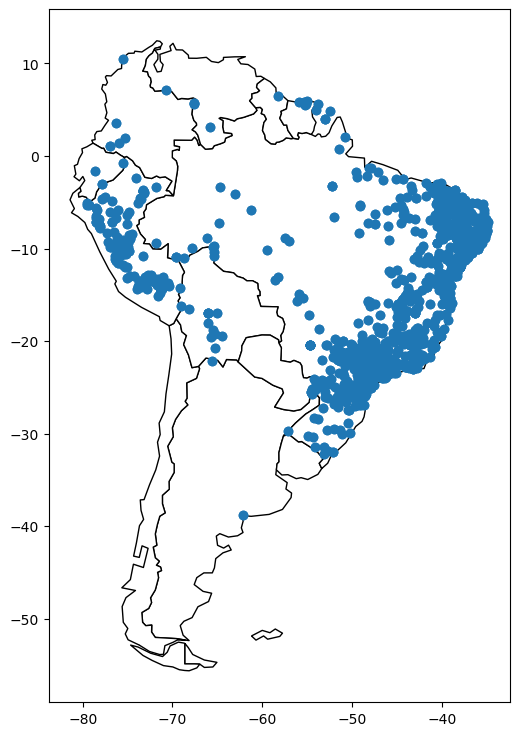

In [46]:
fig, ax = plt.subplots( figsize=(16, 9))
# We restrict to South America.
world[world.continent == 'South America'].plot(ax = ax,
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_duplicated.plot(ax=ax)
#gdf_dates.plot(ax=ax, color='blue', markersize=0.1, label='Filtrados por Data', marker= '.')


plt.show()

In [8]:
gdf_dfdup = gdf_duplicated[gdf_duplicated.Code.isin(df_10.Code)]
gdf_dfdup[gdf_dfdup.duplicated(subset=['Latitude','Longitude'], keep= False)].sort_values(by=['Latitude'])

Code  Name  Latitude  Longitude  Altitude  \
4816   2550056  IVAí  -25.0167     -50.85     850.0   
15959  2550006  IVAÍ  -25.0167     -50.85     808.0   

                          geometry  
4816   POINT (-50.85000 -25.01670)  
15959  POINT (-50.85000 -25.01670)

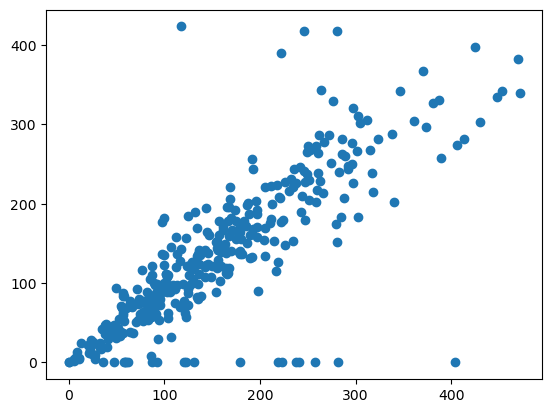

In [63]:
plt.scatter(df_10[df_10.Code== 2550056].Total, df_10[df_10.Code== 2550006].Total)

pq uma tem mais zeros? oq fazer? descartar uma?

In [20]:
gdf_filtered.sort_values(by='Code').drop_duplicates(subset=['Latitude','Longitude'], keep='first', inplace=True)

In [23]:
gdf_filtered = gdf_filtered.sort_values(by='Code').drop_duplicates(subset=['Latitude','Longitude'], keep='first')

In [24]:
gdf_filtered

Code                   Name  Latitude  Longitude  Altitude  \
345     47002            SALINÓPOLIS   -0.6231   -47.3536       NaN   
858     51002                  NAVIO   -0.3992   -51.4203       NaN   
232     52000          SÃO FRANCISCO   -0.5711   -52.5750       NaN   
205     61000  SANTA MARIA DO BOIAÇU   -0.5067   -61.7858       NaN   
325     63000                 CUMARU   -0.5983   -63.3978       NaN   
...       ...                    ...       ...        ...       ...   
2043  8351002               OIAPOQUE    3.8436   -51.8375       NaN   
2032  8360000       MALOCA DO CONTÃO    4.1667   -60.5289       NaN   
1556  8360002       FAZENDA PASSARÃO    3.2078   -60.5711       NaN   
2078  8361000       FAZENDA SÃO JOÃO    3.6608   -61.3839       NaN   
2007  8361004      COLÔNIA DO TAIANO    3.2872   -61.0883       NaN   

                        geometry  
345   POINT (-47.35360 -0.62310)  
858   POINT (-51.42030 -0.39920)  
232   POINT (-52.57500 -0.57110)  
205   POINT (-61.78580 -0.50670)  
325   POINT (-63.39780 -0.59830)  
...                          ...  
2043   POINT (-51.83750 3.84360)  
2032   POINT (-60.52890 4.16670)  
1556   POINT (-60.57110 3.20780)  
2078   POINT (-61.38390 3.66080)  
2007   POINT (-61.08830 3.28720)  

[2111 rows x 6 columns]

In [9]:
gdf_dfdup = gdf_duplicated[gdf_duplicated.Code.isin(df_91.Code)]
gdf_dfdup[gdf_dfdup.duplicated(subset=['Latitude','Longitude'], keep= False)].sort_values(by=['Latitude'])

Empty GeoDataFrame
Columns: [Code, Name, Latitude, Longitude, Altitude, geometry]
Index: []

# raw data

In [65]:
codes_out = df_10[df_10['Date'].dt.day != 1]['Code'].unique()
df_10 = df_10[~df_10.Code.isin(codes_out)]
df_10 = df_10[~df_10.Code.isin([2550056])] # MUDAR ISSO

gdf_filtered = gdf[(gdf.Code.isin(df_10['Code']))]
gdf_filtered.reset_index(inplace=True, drop=True)

In [66]:

df_con = df_10.sort_values(by='Consistency').drop_duplicates(subset=['Code','Date'], keep='first')
df_con['Consistency'].value_counts()

1    742738
2      5007
Name: Consistency, dtype: int64

In [68]:
#df_bruto[df_bruto['Total'].isna()].groupby('Code').size().sort_values(ascending=False).head(40)

df_bruto = df_con.set_index(['Code','Date']).unstack().stack(dropna=False).reset_index()
df_bruto.drop(columns=['Consistency'], inplace=True)
df_bruto

Code       Date  Total
0         47002 1981-01-01  250.0
1         47002 1981-02-01    NaN
2         47002 1981-03-01  207.7
3         47002 1981-04-01  112.0
4         47002 1981-05-01  444.2
...         ...        ...    ...
759955  8361004 2010-08-01  290.1
759956  8361004 2010-09-01  129.0
759957  8361004 2010-10-01  118.9
759958  8361004 2010-11-01  301.2
759959  8361004 2010-12-01  152.2

[759960 rows x 3 columns]

# outliers


In [21]:
def plot_stat(stat, df = df_10):
    df_stat = df[df['Code'] ==stat]
    stat_con = df_stat[df_stat['Consistency'] == 2]
    stat_brut = df_stat[df_stat['Consistency'] == 1]
    plt.plot(stat_brut['Date'], stat_brut['Total'], color='red')
    plt.plot(stat_con['Date'], stat_con['Total'], color='blue')
    #plt.ylim([0,1000])

In [64]:
df_10[df_10['Consistency']==1]['Total'].max()

23331.0

In [65]:
df_10[df_10['Consistency']==2]['Total'].max()

1669.3

In [17]:
df_10[df_10['Consistency']==2].sort_values('Total', ascending=False).head(10)

Code  Consistency       Date   Total
4522268  8250002            2 2001-01-01  1669.3
2827186  2447046            2 2005-01-01  1543.8
3920029    47002            2 1989-04-01  1375.3
4522277  8250002            2 2000-04-01  1267.2
4522279  8250002            2 2000-02-01  1264.5
4522276  8250002            2 2000-05-01  1227.3
4522217  8250002            2 2005-04-01  1146.1
544713   1453000            2 1981-11-01  1104.5
3760479   361000            2 1992-12-01  1097.2
3920065    47002            2 1986-04-01  1091.4

In [4]:
gdf_filtered[gdf_filtered.Code == 8250002]

Code      Name  Latitude  Longitude  Altitude  \
1484  8250002  CALÇOENE    2.4956   -50.9508       NaN   

                       geometry  
1484  POINT (-50.95080 2.49560)

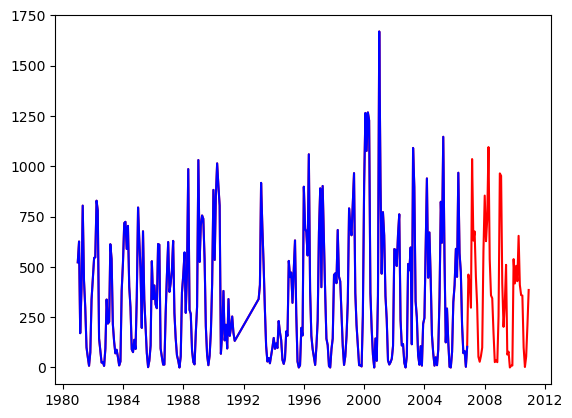

In [22]:
plot_stat(8250002)

In [19]:
df_10[df_10.Code == 8250002]

Code  Consistency       Date  Total
4521779  8250002            1 2010-12-01  385.1
4521780  8250002            1 2010-11-01  210.4
4521781  8250002            1 2010-10-01   53.8
4521782  8250002            1 2010-09-01    2.5
4521783  8250002            1 2010-08-01   99.9
...          ...          ...        ...    ...
4522486  8250002            2 1981-05-01  804.1
4522487  8250002            2 1981-04-01  390.3
4522488  8250002            2 1981-03-01  170.3
4522489  8250002            2 1981-02-01  625.8
4522490  8250002            2 1981-01-01  522.4

[635 rows x 4 columns]

(0.0, 1000.0)

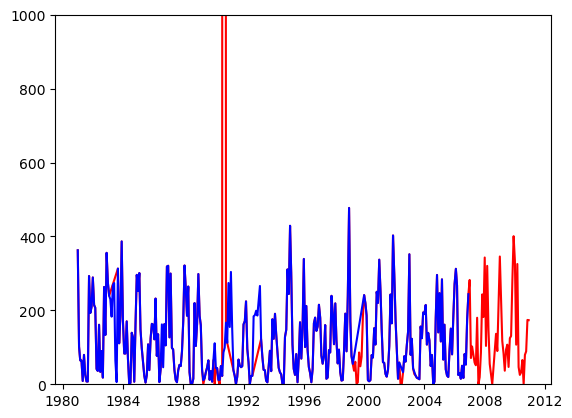

In [67]:
#max
plot_stat(2246033)
plt.ylim([0,1000])

In [1364]:

groups = df_bruto.groupby([df_bruto.Code, df_bruto.Date.dt.month])['Total']
mean, std = groups.transform("mean"), groups.transform("std")
normalized = (df_bruto['Total'] - mean) / std
df_bruto['Normalized'] = normalized
std_lim = 2
outliers = df_bruto[(df_bruto['Normalized'] >= std_lim) | (df_bruto['Normalized'] <= - std_lim)]

In [1365]:
for std_lim in [1,2,2.7, 3, 4]:
    print(f'{std_lim} std: {df_bruto[(df_bruto["Normalized"] >= std_lim) | (df_bruto["Normalized"] <= - std_lim)].shape[0] / df_bruto.shape[0] * 100:.2f}%')

1 std: 25.70%
2 std: 4.52%
2.7 std: 1.63%
3 std: 1.03%
4 std: 0.21%


In [1366]:
std_lim = 2
outliers = df_bruto[(df_bruto['Normalized'] >= std_lim) | (df_bruto['Normalized'] <= - std_lim)]
outliers[outliers['Normalized'] > 5.28]

Code       Date  Consistency  Total  Normalized
9405     240002 1984-10-01          1.0   10.0    5.288031
9550     240002 1996-11-01          1.0    2.5    5.294651
20395    340014 2000-08-01          1.0   10.0    5.294651
21105    340017 1999-10-01          1.0   13.0    5.294651
21621    340020 1982-10-01          1.0    4.6    5.294651
21884    340020 2004-09-01          1.0   13.0    5.294651
21943    340020 2009-08-01          1.0   12.0    5.294651
22484    340038 1994-09-01          1.0   15.0    5.294651
22725    340039 1984-10-01          1.0   18.4    5.283390
23266    340045 1999-11-01          1.0   57.0    5.294651
23276    340045 2000-09-01          1.0    7.6    5.294651
23708    340049 2006-09-01          1.0   58.0    5.294651
24141    340067 1982-10-01          1.0    5.0    5.294651
25316    340109 1990-09-01          1.0    3.6    5.294651
27464    343003 1989-09-01          1.0  893.5    5.285660
36512    437024 1993-09-01          1.0    2.8    5.291274
38756    438032 2000-09-01          1.0   23.0    5.283390
41876    439001 1990-09-01          1.0    0.8    5.294651
43270    439030 1986-11-01          1.0    5.1    5.294651
43316    439030 1990-09-01          1.0   21.0    5.294651
44277    440000 2010-10-01          1.0  102.0    5.285959
44876    440007 2000-09-01          1.0   23.6    5.294651
45956    440017 2000-09-01          1.0   23.0    5.287442
46077    440017 2010-10-01          1.0  103.0    5.284428
47481    440034 2007-10-01          1.0  105.6    5.294651
53277    538003 2010-10-01          1.0   71.2    5.294646
56770    539005 2001-11-01          1.0   43.6    5.289079
59516    540020 1990-09-01          1.0   68.4    5.280417
59876    540114 1990-09-01          1.0   68.4    5.280508
90835    739060 1990-08-01          1.0    9.0    5.294651
92215    741003 1985-08-01          1.0    1.6    5.294651
126522  1142017 1994-07-01          1.0   10.0    5.294651
128274  1144014 1990-07-01          1.0    9.2    5.294651
139386  1242016 1986-07-01          1.0    0.7    5.294651
145902  1250001 1989-07-01          1.0   14.2    5.294651
150126  1344002 1981-07-01          1.0   14.4    5.294651

## exemplo outlier

<AxesSubplot: xlabel='Date', ylabel='Total'>

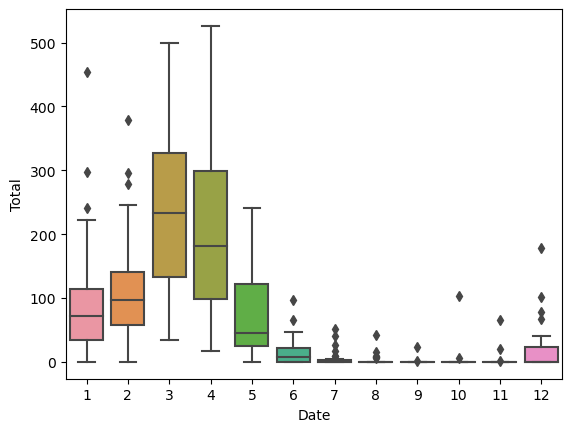

In [72]:
test = df_bruto[df_bruto['Code'] == 440017]
#sns.kdeplot(data=test, hue=test.Date.dt.month, x='Total')
sns.boxplot(data=test, x=test.Date.dt.month, y='Total')

In [73]:
df_bruto[(df_bruto.Date.dt.month ==10) & (df_bruto.Code == 440017)]

Code       Date  Consistency  Total  Normalized
45729  440017 1981-10-01          1.0    0.0   -0.193960
45741  440017 1982-10-01          1.0    0.0   -0.193960
45753  440017 1983-10-01          1.0    0.0   -0.193960
45765  440017 1984-10-01          1.0    0.0   -0.193960
45777  440017 1985-10-01          1.0    0.0   -0.193960
45789  440017 1986-10-01          1.0    0.0   -0.193960
45801  440017 1987-10-01          1.0    0.0   -0.193960
45813  440017 1988-10-01          1.0    0.0   -0.193960
45825  440017 1989-10-01          1.0    0.0   -0.193960
45837  440017 1990-10-01          1.0    0.0   -0.193960
45849  440017 1991-10-01          1.0    0.0   -0.193960
45861  440017 1992-10-01          1.0    0.0   -0.193960
45873  440017 1993-10-01          1.0    0.0   -0.193960
45885  440017 1994-10-01          1.0    0.0   -0.193960
45897  440017 1995-10-01          1.0    0.0   -0.193960
45909  440017 1996-10-01          1.0    0.0   -0.193960
45921  440017 1997-10-01          1.0    0.0   -0.193960
45933  440017 1998-10-01          1.0    0.0   -0.193960
45945  440017 1999-10-01          1.0    0.0   -0.193960
45957  440017 2000-10-01          1.0    0.0   -0.193960
45969  440017 2001-10-01          1.0    0.0   -0.193960
45981  440017 2002-10-01          1.0    0.0   -0.193960
45993  440017 2003-10-01          1.0    0.0   -0.193960
46005  440017 2004-10-01          1.0    0.0   -0.193960
46017  440017 2005-10-01          1.0    0.0   -0.193960
46029  440017 2006-10-01          1.0    6.4    0.146445
46041  440017 2007-10-01          1.0    0.0   -0.193960
46053  440017 2008-10-01          1.0    0.0   -0.193960
46065  440017 2009-10-01          1.0    0.0   -0.193960
46077  440017 2010-10-01          1.0  103.0    5.284428

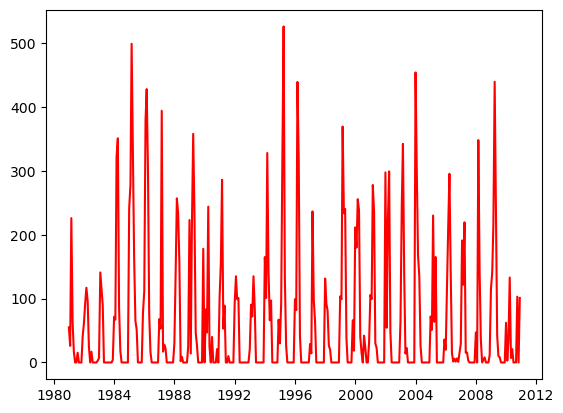

In [74]:
plot_stat(440017)

In [75]:
gdf_filtered[gdf_filtered.Code == 440017]

Code         Nome  Latitude  Longitude  Altitude  \
1212  440017  NOVA RUSSAS   -4.7167   -40.5667     241.0   

                        geometry  
1212  POINT (-40.56670 -4.71670)

<AxesSubplot: xlabel='Date', ylabel='Total'>

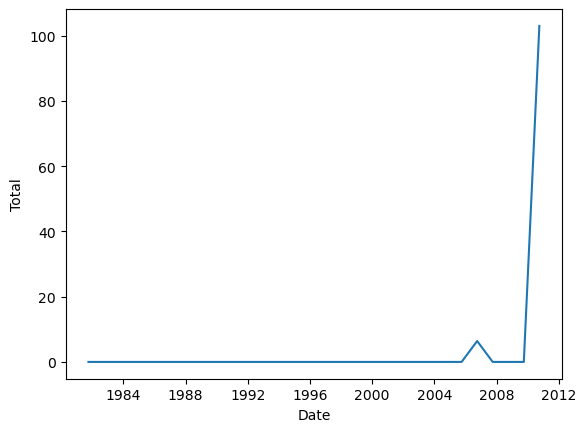

In [76]:
test_10 = test[test.Date.dt.month == 10]
sns.lineplot(test_10, x='Date', y='Total')

# distance

## neighbors

In [14]:
from sklearn.neighbors import BallTree
def get_neighbors(src_points, candidates, k_neighbors):
    """Find nearest neighbors for all source points from a set of candidate points"""

    # Create tree from the candidate points
    tree = BallTree(candidates, leaf_size=40, metric='haversine')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    return indices, distances


def nearest_neighbors(left_gdf, right_gdf, k_neighbors=5):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.
    
    NOTICE: Assumes that the input Points are in WGS84 projection (lat/lon).
    """
    
    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name
    
    # Ensure that index in right gdf is formed of sequential numbers
    right = right_gdf.copy().reset_index(drop=True)
    
    # Parse coordinates from points and insert them into a numpy array as RADIANS
    # Notice: should be in Lat/Lon format 
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.y * np.pi / 180, geom.x * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.y * np.pi / 180, geom.x * np.pi / 180)).to_list())
        
    closest, dist = get_neighbors(src_points=left_radians, candidates=right_radians, k_neighbors = k_neighbors)
        
    return closest

In [15]:
index_near = nearest_neighbors(gdf_filtered.to_crs('EPSG:4326'), gdf_filtered.to_crs('EPSG:4326'), k_neighbors=6)

In [16]:
index_near

array([[   0,    1,    2, ..., 2108, 2109, 2110],
       [1143, 1814,  838, ..., 2106, 1639,  561],
       [1147, 1209,  138, ..., 1953, 1640, 1952],
       [1808, 1229, 1490, ..., 2103, 1441,  651],
       [1219, 1224,   48, ..., 1973, 1638,  523],
       [1146, 1170, 1460, ..., 1950, 1708, 1956]], dtype=int64)

## nearest

In [73]:
from sklearn.neighbors import BallTree
def get_nearest(src_points, candidates, k_neighbors=3):
    """Find nearest neighbors for all source points from a set of candidate points"""

    # Create tree from the candidate points
    tree = BallTree(candidates, leaf_size=15, metric='haversine')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    # note: for the second closest points, you would take index 1, etc.
    closest = indices[1]
    closest_dist = distances[1]

    # Return indices and distances
    return (closest, closest_dist)


def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.
    
    NOTICE: Assumes that the input Points are in WGS84 projection (lat/lon).
    """
    
    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name
    
    # Ensure that index in right gdf is formed of sequential numbers
    right = right_gdf.copy().reset_index(drop=True)
    
    # Parse coordinates from points and insert them into a numpy array as RADIANS
    # Notice: should be in Lat/Lon format 
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.y * np.pi / 180, geom.x * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.y * np.pi / 180, geom.x * np.pi / 180)).to_list())
    
    # Find the nearest points
    # -----------------------
    # closest ==> index in right_gdf that corresponds to the closest point
    # dist ==> distance between the nearest neighbors (in kmeters)
    
    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)

    # Return points from right GeoDataFrame that are closest to points in left GeoDataFrame
    closest_points = right.loc[closest]
    
    # Ensure that the index corresponds the one in left_gdf
    closest_points = closest_points.reset_index(drop=True)
    
    # Add distance if requested 
    if return_dist:
        # Convert to meters from radians
        earth_radius = 6371  # kmeters
        closest_points['distance'] = dist * earth_radius
        
    return closest_points

In [74]:
closest = nearest_neighbor(gdf_filtered.to_crs('EPSG:4326'), gdf_filtered.to_crs('EPSG:4326'), return_dist= True)
closest = closest.rename(columns={'geometry': 'closest_geom'})
gdf_closest  = gdf_filtered.copy()
gdf_closest['closest_geom'] = closest['closest_geom'].values
gdf_closest['distance'] = closest['distance'].values
gdf_closest

Code                 Name  Latitude  Longitude  Altitude  \
0      538009    LIMOEIRO DO NORTE   -5.1333   -38.1000      35.0   
1      638014                  ICÓ   -6.4089   -38.8636     160.0   
2      747001             GOIATINS   -7.7147   -47.3150     185.0   
3      936076               TRAIPU   -9.9728   -37.0033       NaN   
4      648000              XAMBIOÁ   -6.4131   -48.5333     148.0   
...       ...                  ...       ...        ...       ...   
2106  2245083  SÃO JOÃO DE ITAJUBÁ  -22.3756   -45.4469     845.0   
2107  2143006              BARROSO  -21.1872   -43.9800     881.0   
2108  2245088          MARIA DA FÉ  -22.3147   -45.3731    1200.0   
2109  2651043               PALMAS  -26.4833   -51.9833    1100.0   
2110  2245104        SAPUCAÍ-MIRIM  -22.7453   -45.7447       NaN   

                         geometry                 closest_geom   distance  
0      POINT (-38.10000 -5.13330)   POINT (-38.13330 -5.25000)  13.490241  
1      POINT (-38.86360 -6.40890)   POINT (-38.85000 -6.40000)   1.799396  
2      POINT (-47.31500 -7.71470)   POINT (-47.46440 -7.32310)  46.554522  
3      POINT (-37.00330 -9.97280)  POINT (-36.82390 -10.21530)  33.358836  
4      POINT (-48.53330 -6.41310)   POINT (-48.47030 -6.67220)  29.639294  
...                           ...                          ...        ...  
2106  POINT (-45.44690 -22.37560)  POINT (-45.37310 -22.31470)  10.171763  
2107  POINT (-43.98000 -21.18720)  POINT (-43.87860 -21.27470)  14.322090  
2108  POINT (-45.37310 -22.31470)  POINT (-45.44690 -22.37560)  10.171763  
2109  POINT (-51.98330 -26.48330)  POINT (-52.00000 -26.48330)   1.662095  
2110  POINT (-45.74470 -22.74530)  POINT (-45.70000 -22.76670)   5.164398  

[2111 rows x 8 columns]

In [75]:
from shapely.geometry import LineString

gdf_closest['link'] = gdf_closest.apply(lambda row: LineString([row['geometry'], row['closest_geom']]), axis=1)
gdf_closest_links = gdf_closest.copy()
gdf_closest_links = gdf_closest_links.set_geometry('link')

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


<AxesSubplot: >

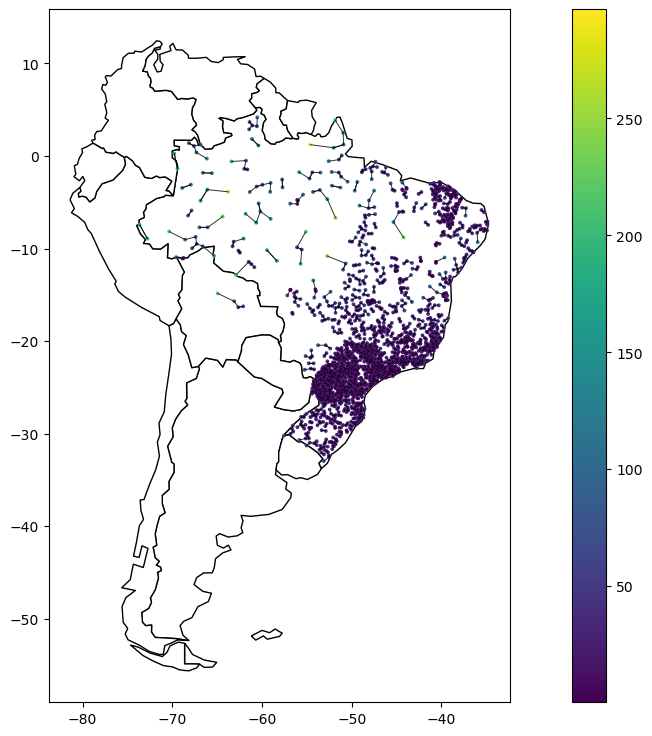

In [76]:
# Plot the connecting links between buildings and stops and color them based on distance
fig, ax = plt.subplots( figsize=(16, 9))
# We restrict to South America.
world[world.continent == 'South America'].plot(ax = ax,
    color='white', edgecolor='black')


gdf_closest_links.plot(alpha=0.8, lw=0.7, ax=ax, legend=True, color='black')
gdf_closest.plot(ax=ax, markersize=3,label=r'distance from closest', column='distance', legend=True)
#ax = stops.plot(ax=ax, markersize=4, marker='o', color='red', alpha=0.9, zorder=3)

#ax.set_facecolor('black')

In [77]:
dist = gdf_closest['geometry'].to_crs(epsg=32662).distance(gdf_closest['closest_geom'].to_crs(epsg=32662))
dist.max() / 1000

297.0504010835155

In [78]:
gdf_closest['distance'].max()

296.66852792264945

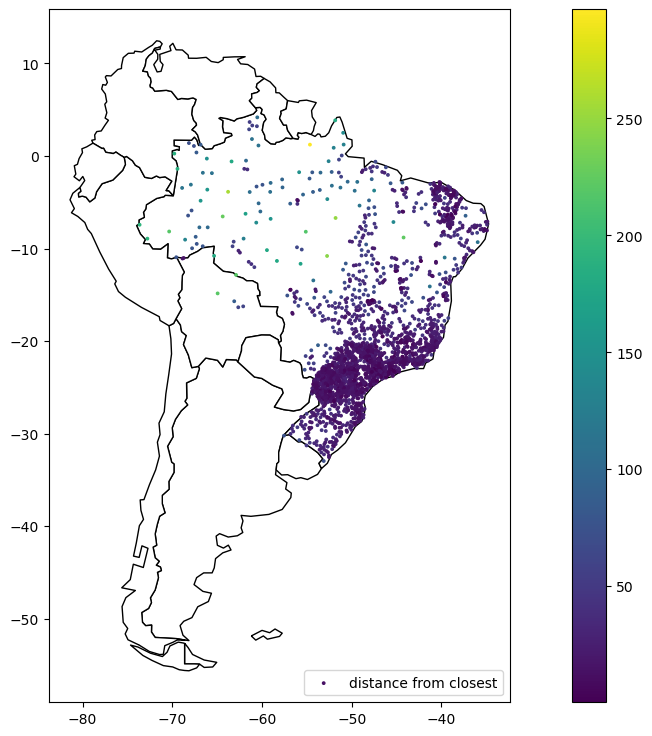

In [1381]:
fig, ax = plt.subplots( figsize=(16, 9))
# We restrict to South America.
world[world.continent == 'South America'].plot(ax = ax,
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_closest.plot(ax=ax, markersize=3,label=r'distance from closest', column='distance', legend=True)
#gdf_dates.plot(ax=ax, color='blue', markersize=0.1, label='Filtrados por Data', marker= '.')


plt.legend(loc='lower right')

plt.show()

## descartar outliers

In [80]:
std_lim = 2.7

In [103]:
def detect_outliers(df1, std_lim):
    groups = df1.groupby([df1.Code, df1.Date.dt.month])['Total']
    mean, std = groups.transform("mean"), groups.transform("std")
    normalized = (df1['Total'] - mean) / std
    df1['Normalized'] = normalized
    outliers = df1[(df1['Normalized'] >= std_lim) | (df1['Normalized'] <= - std_lim)]
    return outliers

def outliers_neighbors(row, idx = index_near, std = std_lim):
    code = row.Code
    date = row.Date
    indexx = (gdf_filtered['Code'] == code).idxmax()
    val = gdf_filtered.iloc[idx[:, indexx]]['Code'].values
    out_close = df_bruto[(df_bruto['Code'].isin(val) )& (df_bruto['Date'] == date)]
    return (out_close['Normalized'].abs() >= std).sum()

def drop_outliers(df, std_lim):
    outliers = detect_outliers(df, std_lim)
    results_out = outliers[outliers.apply(outliers_neighbors, axis=1) == 1]
    df_out_drop = df.drop(results_out.index)
    return df_out_drop

In [104]:
index_near = nearest_neighbors(gdf_filtered, gdf_filtered, 6)
df_out_drop = drop_outliers(df_bruto, std_lim)
df_out_drop.drop(columns=['Normalized'], inplace=True)
df_out_drop = df_out_drop.set_index(['Code','Date']).unstack().stack(dropna=False).reset_index()
df_out_drop.to_pickle('df_out_drop.pkl')

In [129]:

outliers = detect_outliers(df_bruto, std_lim)
print(outliers.shape[0]/df_bruto.shape[0]*100, r'% de outliers')
print((outliers.shape[0] - df_out_drop.loc[outliers.index].dropna().shape[0])/outliers.shape[0] * 100,r'% dos outliers foram dropados')

1.6339017843044372 % de outliers
32.431344124989934 % dos outliers foram dropados


In [114]:
df_out_drop.sort_values(by='Total', ascending=False).head(20)

Code       Date   Total
154547  1348000 1989-12-01  1677.1
212448  1741009 1985-01-01  1615.7
267130  1944020 1981-11-01  1348.2
757671  8250002 2000-04-01  1267.2
484021  2345036 1996-02-01  1236.6
757672  8250002 2000-05-01  1227.3
757731  8250002 2005-04-01  1146.1
220344  1749005 1983-01-01  1126.2
165970  1453000 1981-11-01  1104.5
29306    345006 1993-03-01  1101.4
757767  8250002 2008-04-01  1095.0
63        47002 1986-04-01  1091.4
757707  8250002 2003-04-01  1090.7
220452  1749005 1992-01-01  1084.4
171       47002 1995-04-01  1084.3
494062  2346065 1992-11-01  1082.5
757670  8250002 2000-03-01  1076.1
757624  8250002 1996-05-01  1059.1
142283  1246000 1987-12-01  1044.0
494365  2346066 1988-02-01  1038.6

### exemplo


In [129]:
outliers

NameError: name 'outliers' is not defined

In [102]:

row = outliers.loc[[208198]]
code = row.Code.values[0]
date = row.Date.values[0]
indexx = (gdf_filtered['Code'] == code).idxmax()
val = gdf_filtered.iloc[index_near[:, indexx]]['Code'].values
out_close = df_bruto[(df_bruto['Code'].isin(val) )& (df_bruto['Date'] == date)]
out_close
#(out_close['Normalized'].abs() >= std_lim).sum()

Code       Date    Total  Normalized
188038  1555001 1990-11-01    129.6   -1.366506
188398  1556000 1990-11-01    138.9   -0.422395
188758  1556001 1990-11-01    106.3   -0.475124
207838  1655002 1990-11-01     72.0   -0.908070
208198  1656004 1990-11-01  11588.0    5.099335
225838  1756000 1990-11-01      NaN         NaN

In [100]:
(out_close['Normalized'].abs() >= std_lim).sum()

1

In [95]:
# fazer plots dos normalizados e tal
test_out = df_bruto[df_bruto['Code'].isin(val)]
test_out

Code       Date  Total  Normalized
433080  2246022 1981-01-01  392.9    0.879152
433081  2246022 1981-02-01   95.4   -1.139558
433082  2246022 1981-03-01    0.0   -2.201667
433083  2246022 1981-04-01    0.0   -1.699799
433084  2246022 1981-05-01    0.0   -1.205004
...         ...        ...    ...         ...
499675  2346329 2010-08-01    0.0   -0.827720
499676  2346329 2010-09-01   80.0    0.019388
499677  2346329 2010-10-01   90.6   -0.583696
499678  2346329 2010-11-01  178.7    0.463876
499679  2346329 2010-12-01  152.5   -0.597009

[2160 rows x 4 columns]

In [203]:
mean_test = test_out.groupby(['Code', test_out.Date.dt.month]).Total.mean()


Code    Date
340008  1       145.296667
        2       179.950000
        3       284.820000
        4       241.846667
        5       121.076667
                   ...    
639044  8        10.423333
        9        13.043333
        10       15.836667
        11        7.573333
        12       49.923333
Name: Total, Length: 72, dtype: float64

<AxesSubplot: xlabel='Date', ylabel='Total'>

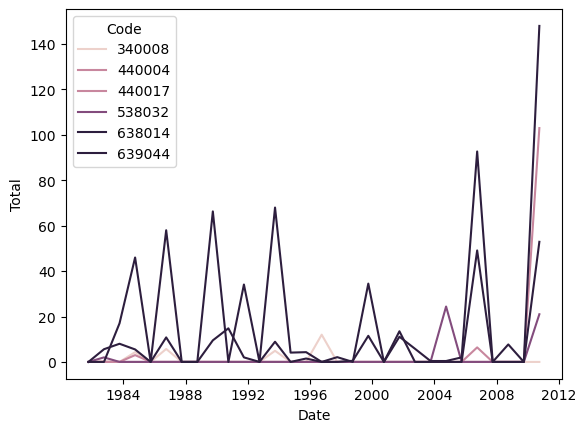

In [187]:
test_10_out = test_out[test_out.Date.dt.month == 10]
sns.lineplot(test_10_out, x='Date', y='Total', hue='Code')

<AxesSubplot: xlabel='Date', ylabel='Total'>

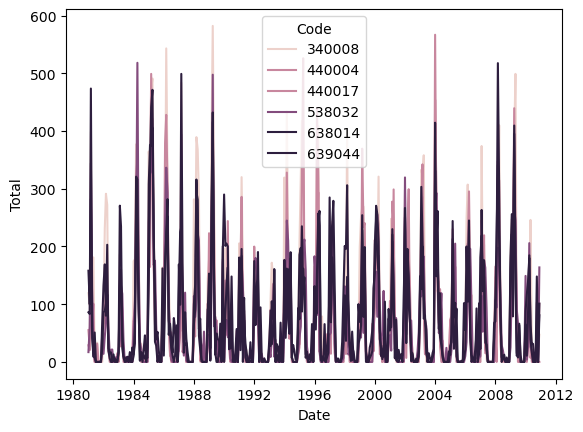

In [216]:
sns.lineplot(test_out, x='Date', y='Total', hue='Code')

# fill NANS.

In [110]:
df_out_drop = pd.read_pickle('df_out_drop.pkl')


In [131]:
#EASY METHODS NA. comparar dps com os outros
#df_out_drop['Total'] = df_out_drop.groupby(['Code', df_out_drop.Date.dt.month])['Total'].apply(lambda x: x.fillna(x.mean()))
#df_out_drop['Total'] = df_out_drop.groupby(['Code', df_out_drop.Date.dt.month])['Total'].apply(lambda x: x.fillna(x.interpolate(method='linear')))

In [132]:
df_na = df_out_drop[df_out_drop['Total'].isna()]
df_na.groupby(['Code', df_na.Date.dt.month]).size().sort_values(ascending=False)

Code     Date
352001   7       8
2346033  1       7
2147071  12      7
2149017  1       6
2245066  6       6
                ..
2045002  12      1
         11      1
         9       1
2045001  4       1
8361004  2       1
Length: 10696, dtype: int64

In [134]:
print(df_na.shape[0] / df_bruto.shape[0] * 100, r'% de valores nulos')

2.1372177483025423 % de valores nulos


## LINEAR REGRESSION

In [135]:
def fill_na_LR(row, idx = index_near):
    code = row.Code
    date = row.Date
    indexx = (gdf_filtered['Code'] == code).idxmax()
    val = gdf_filtered.iloc[idx[:, indexx]]['Code'].values
    close = df_out_drop[(df_out_drop['Code'].isin(val)) ]
    close = close[close.Date.dt.month == row.Date.month]
    mean_close = close[close.Code != code].groupby(close.Date).Total.mean()
    x = mean_close.values
    y = close[close['Code'] == code]['Total'].values
    x = x[~np.isnan(y)]
    y = y[~np.isnan(y)]
    y = y[~np.isnan(x)]
    x = x[~np.isnan(x)]
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    target = mean_close.loc[date]
    if np.isnan(target):
        predict = np.nan
    else:    
        model = LinearRegression()
        model.fit(x, y)
        predict = model.predict(target.reshape(-1, 1))[0][0]
    return predict

In [136]:
NA_filled_LR = df_na.apply(fill_na_LR , axis=1)
df_na['LR'] = NA_filled_LR


C:\Users\luisg\AppData\Local\Temp\ipykernel_10432\2706238505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['LR'] = NA_filled_LR


In [137]:
df_na['LR'].isnull().sum()

361

In [ ]:
#df_filled['Total'] = df_out_drop.fillna(df_na['LR'])
#df_filled['Total'] = df_filled.groupby(['Code', df_filled.Date.dt.month])['Total'].apply(lambda x: x.fillna(x.mean()))
#df_filled

## REGIONAL VECTOR

In [16]:
def weighted_mean(df, values, weights, groupby):
    df = df.copy()
    grouped = df.groupby(groupby)
    df['weighted_average'] = df[values] / grouped[weights].transform('sum') * df[weights]
    return grouped['weighted_average'].sum(min_count=1) #min_count is required for Grouper objects

In [139]:
gdf_filtered = gdf_filtered.to_crs('ESRI:102032')

In [140]:
def fill_na_RV(row, idx = index_near):
    code = row.Code
    date = row.Date
    indexx = (gdf_filtered['Code'] == code).idxmax()
    val = gdf_filtered.iloc[idx[:, indexx]]['Code'].values

    close = df_out_drop[(df_out_drop['Code'].isin(val)) ]
    close = close[close.Date.dt.month == row.Date.month]
    mean_close = close[close.Code != code].groupby(close.Date).Total.mean()
    stat = gdf_filtered.iloc[[indexx]]
    stations = gdf_filtered[(gdf_filtered.Code.isin(val)) & (gdf_filtered.Code != code)]
    
    stations['dist'] = 1/(stations['geometry'].apply(lambda x: stat.distance(x)))
    df_stat = close[close.Code == code]
    close = close[close.Code != code]
    close = close.merge(stations[['Code', 'dist']], on='Code')
    mean_close = weighted_mean(close, 'Total', 'dist', 'Date')

    x = mean_close.values
    y = df_stat['Total'].values
    x = x[~np.isnan(y)]
    y = y[~np.isnan(y)]
    y = y[~np.isnan(x)]
    x = x[~np.isnan(x)]
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    target = mean_close.loc[date]
    if np.isnan(target):
        predict = np.nan
    else:    
        model = LinearRegression()
        model.fit(x, y)
        predict = model.predict(target.reshape(-1, 1))[0][0]
    return predict



In [141]:
df_na.iloc[[0,1,2]].apply(fill_na_RV , axis=1)

1     448.114159
68      7.905077
99    747.319373
dtype: float64

In [142]:
NA_filled_RV = df_na.apply(fill_na_RV , axis=1)
df_na['RV'] = NA_filled_RV
df_na['RV'].isnull().sum()

C:\Users\luisg\AppData\Local\Temp\ipykernel_10432\4116948626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['RV'] = NA_filled_RV


361

## test LR

In [ ]:
row = df_na.loc[[21561]]
code = row.Code.values[0]
date = row.Date.values[0]
indexx = (gdf_filtered['Code'] == code).idxmax()
val = gdf_filtered.iloc[index_near[:, indexx]]['Code'].values
close = df_out_drop[(df_out_drop['Code'].isin(val)) ]
close = close[close.Date.dt.month == row.Date.dt.month.values[0]]
mean_close = close[close.Code != code].groupby(close.Date).Total.mean()


In [ ]:
x = mean_close.values
y = close[close['Code'] == code]['Total'].values
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [ ]:
model = LinearRegression()
model.fit(x, y)
#row.Total = 
model.predict(mean_close.loc[date].reshape(-1, 1))
#row

array([[2.15433228]])

In [586]:
date = '2009-10-01'
target = mean_close.loc[date]
print(target)
if np.isnan(target):
    predict = np.nan
else:
    predict = model.predict(target.reshape(-1, 1))[0][0]

print(predict)

1.25
1.8164225006337642


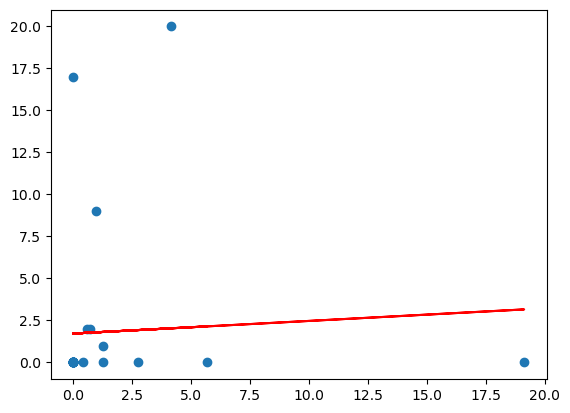

In [579]:
# calculate the line using the model
yhat = model.predict(x)
# plot the data and the model prediction
plt.scatter(x, y)
plt.plot(x, yhat, color='red')
#plt.plot(x, yhat*2, color='green', linestyle='--')

In [627]:
df_out_drop['Total'] = df_out_drop['Total'].fillna(df_na2['Total'])
df_out_drop

Code       Date       Total
0         47002 1981-01-01  250.000000
1         47002 1981-02-01  412.054142
2         47002 1981-03-01  207.700000
3         47002 1981-04-01  112.000000
4         47002 1981-05-01  444.200000
...         ...        ...         ...
760315  8361004 2010-08-01  290.100000
760316  8361004 2010-09-01  129.000000
760317  8361004 2010-10-01  118.900000
760318  8361004 2010-11-01  301.200000
760319  8361004 2010-12-01  152.200000

[760320 rows x 3 columns]

## mapa na_outliers

<AxesSubplot: ylabel='Count'>

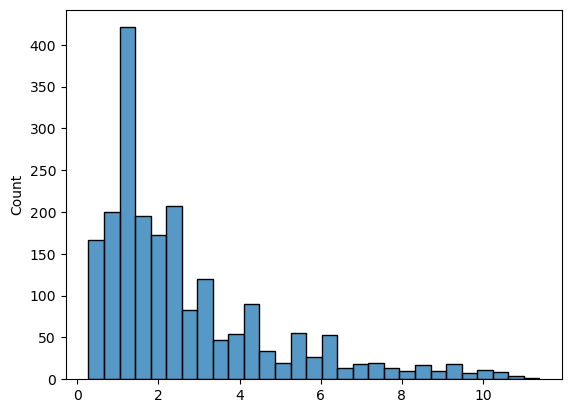

In [700]:
na_values = df_na.groupby('Code').size().sort_values(ascending=False) / 360 * 100
sns.histplot(na_values)

In [483]:
gdf_na_final = gdf_filtered[gdf_filtered['Code'].isin(df_na.Code.unique())].sort_values(by='Code')
gdf_na_final['Nan'] = na_values.sort_index().values

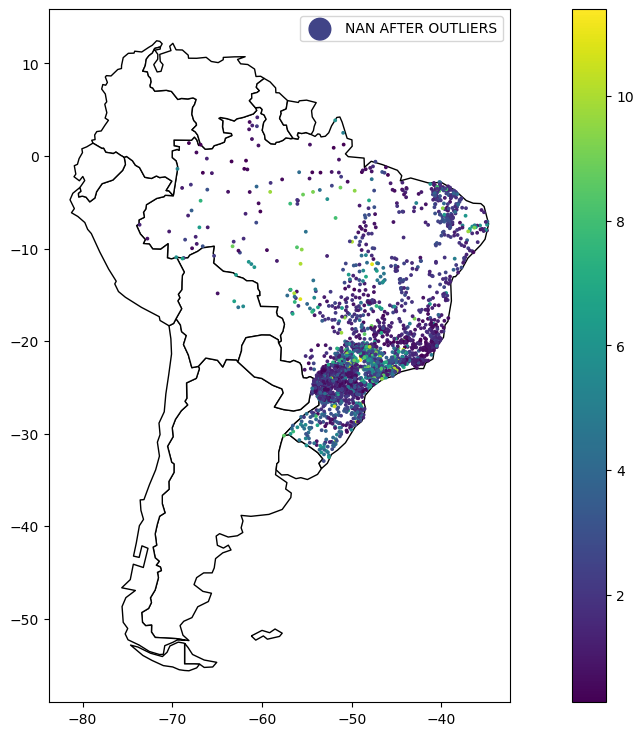

In [484]:
fig, ax = plt.subplots( figsize=(16, 9))
# We restrict to South America.
world[world.continent == 'South America'].plot(ax = ax,
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_na_final.plot(ax=ax, markersize=3,label='NAN AFTER OUTLIERS', column='Nan', legend=True,)
#gdf_dates.plot(ax=ax, color='blue', markersize=0.1, label='Filtrados por Data', marker= '.')


plt.legend(loc='lower right')
ax.legend(markerscale=9)

plt.show()

In [485]:
gdf_na_final.loc[1907]

Code                           466001
Nome                           GAVIÃO
Latitude                      -4.8392
Longitude                    -66.8506
Altitude                         71.0
geometry     POINT (-66.8506 -4.8392)
Nan                               7.5
Name: 1907, dtype: object

In [447]:
df_10[df_10.Code == 466001]

Code  Consistency       Date  Total
3914246  466001            1 2010-12-01  310.3
3914247  466001            1 2010-11-01  103.0
3914248  466001            1 2010-10-01  225.9
3914249  466001            1 2010-09-01   93.6
3914250  466001            1 2010-08-01   50.6
...         ...          ...        ...    ...
3914742  466001            2 1981-05-01  154.9
3914743  466001            2 1981-04-01  367.2
3914744  466001            2 1981-03-01  263.7
3914745  466001            2 1981-02-01  333.3
3914746  466001            2 1981-01-01  442.2

[433 rows x 4 columns]

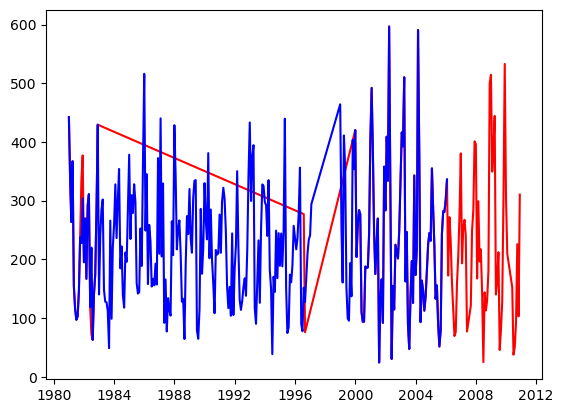

In [448]:
plot_stat(466001)

In [442]:
gdf_na_final['Nan'].sort_values(ascending=False)

1907    57.500000
1836    44.166667
168     25.277778
1556    24.166667
367     19.166667
          ...    
2061     0.277778
1523     0.277778
1838     0.277778
465      0.277778
1915     0.277778
Name: Nan, Length: 2107, dtype: float64

## test RV

In [734]:
#gdf_filtered = gdf_filtered.to_crs('ESRI:102032')

In [936]:
row = df_na.loc[[21561]]
code = row.Code.values[0]
date = row.Date.values[0]
indexx = (gdf_filtered['Code'] == code).idxmax()
val = gdf_filtered.iloc[index_near[:, indexx]]['Code'].values
close = df_out_drop[(df_out_drop['Code'].isin(val)) ]
close = close[close.Date.dt.month == row.Date.dt.month.values[0]]


In [886]:
index_near

array([[   0,    1,    2, ..., 2109, 2110, 2111],
       [1144, 1815,  839, ..., 2107, 1640,  561],
       [1148, 1210,  138, ..., 1954, 1641, 1953],
       [1809, 1230, 1491, ..., 2104, 1442,  651],
       [1220, 1225,   48, ..., 1974, 1639,  523],
       [1147, 1171, 1461, ..., 1951, 1709, 1957]], dtype=int64)

In [937]:
gdf_filtered.iloc[index_near[:, indexx]]

Code          Nome  Latitude  Longitude  Altitude  \
1173  340018      IBIAPINA   -3.9167   -40.8833     885.0   
1224  340031       UBAJARA   -3.8500   -40.9167     870.0   
1209  340015  FRECHEIRINHA   -3.7667   -40.8167     100.0   
1238  440022         GRAÇA   -4.0500   -40.7500     190.0   
1153  340109        PACUJÁ   -3.9833   -40.7000      74.0   
1227  440004     CARNAUBAL   -4.1667   -40.9500     700.0   

                        geometry  
1173  POINT (-40.88330 -3.91670)  
1224  POINT (-40.91670 -3.85000)  
1209  POINT (-40.81670 -3.76670)  
1238  POINT (-40.75000 -4.05000)  
1153  POINT (-40.70000 -3.98330)  
1227  POINT (-40.95000 -4.16670)

In [938]:
stat = gdf_filtered.iloc[[indexx]]
stations = gdf_filtered[(gdf_filtered.Code.isin(val)) & (gdf_filtered.Code != code)]


In [939]:
# qual distancia usar? e mudar o CRS
stations['dist'] = 1/(stations['geometry'].apply(lambda x: stat.distance(x).values[0]))

C:\Users\luisg\AppData\Local\Temp\ipykernel_13064\4041006461.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  stations['dist'] = 1/(stations['geometry'].apply(lambda x: stat.distance(x).values[0]))
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [940]:
df_stat = close[close.Code == code]
close = close[close.Code != code]
close = close.merge(stations[['Code', 'dist']], on='Code')

In [26]:
def weighted_mean(df, values, weights, groupby):
    df = df.copy()
    grouped = df.groupby(groupby)
    df['weighted_average'] = df[values] / grouped[weights].transform('sum') * df[weights]
    return grouped['weighted_average'].sum(min_count=1) #min_count is required for Grouper objects

In [942]:
mean_close = weighted_mean(close, 'Total', 'dist', 'Date')

In [943]:
x = mean_close.values
y = df_stat['Total'].values
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [944]:
model = LinearRegression()
model.fit(x, y)
#row.Total = 
model.predict(mean_close.loc[date].reshape(-1, 1))

array([[1.78655904]])

In [945]:
target = mean_close.loc[date]
print(target)
if np.isnan(target):
    predict = np.nan
else:
    predict = model.predict(target.reshape(-1, 1))[0][0]

print(predict)

8.404232473866719
1.7865590357547751


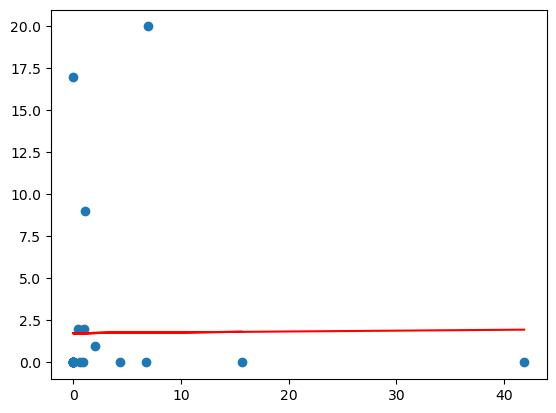

In [946]:
# calculate the line using the model
yhat = model.predict(x)
# plot the data and the model prediction
plt.scatter(x, y)
plt.plot(x, yhat, color='red')
#plt.plot(x, yhat*2, color='green', linestyle='--')

## comparação

In [ ]:
na_clim = df_out_drop.groupby(['Code', df_out_drop.Date.dt.month], group_keys=False)['Total'].apply(lambda x: x.fillna(x.mean()))
df_na['CLIM'] = na_clim
na_inter = df_out_drop.groupby(['Code'], group_keys=False)['Total'].apply(lambda x: x.fillna(x.interpolate(method='linear')))
df_na['INTER'] = na_inter


In [64]:
df_na.min()

Code                   47002
Date     1981-01-01 00:00:00
Total                    NaN
LR                -57.124464
RV                -58.339517
CLIM                     0.0
INTER                    0.0
dtype: object

In [205]:
df_na.min()

LR       0.0
CLIM     0.0
INTER    0.0
RV       0.0
dtype: float64

In [65]:
(df_na[['LR', 'CLIM', 'INTER', 'RV']] < 0).sum()

LR       290
CLIM       0
INTER      0
RV       322
dtype: int64

In [66]:
df_na = df_na[['LR', 'CLIM', 'INTER', 'RV']].clip(0)
df_na.min()

LR       0.0
CLIM     0.0
INTER    0.0
RV       0.0
dtype: float64

In [67]:
df_na.to_pickle('df_na.pkl')

 4 fill na:
 - Regressão linear dos vizinhos
 - Regional Vector dos vizinhos
 - Média climatológica do mes
 - interpolação linear

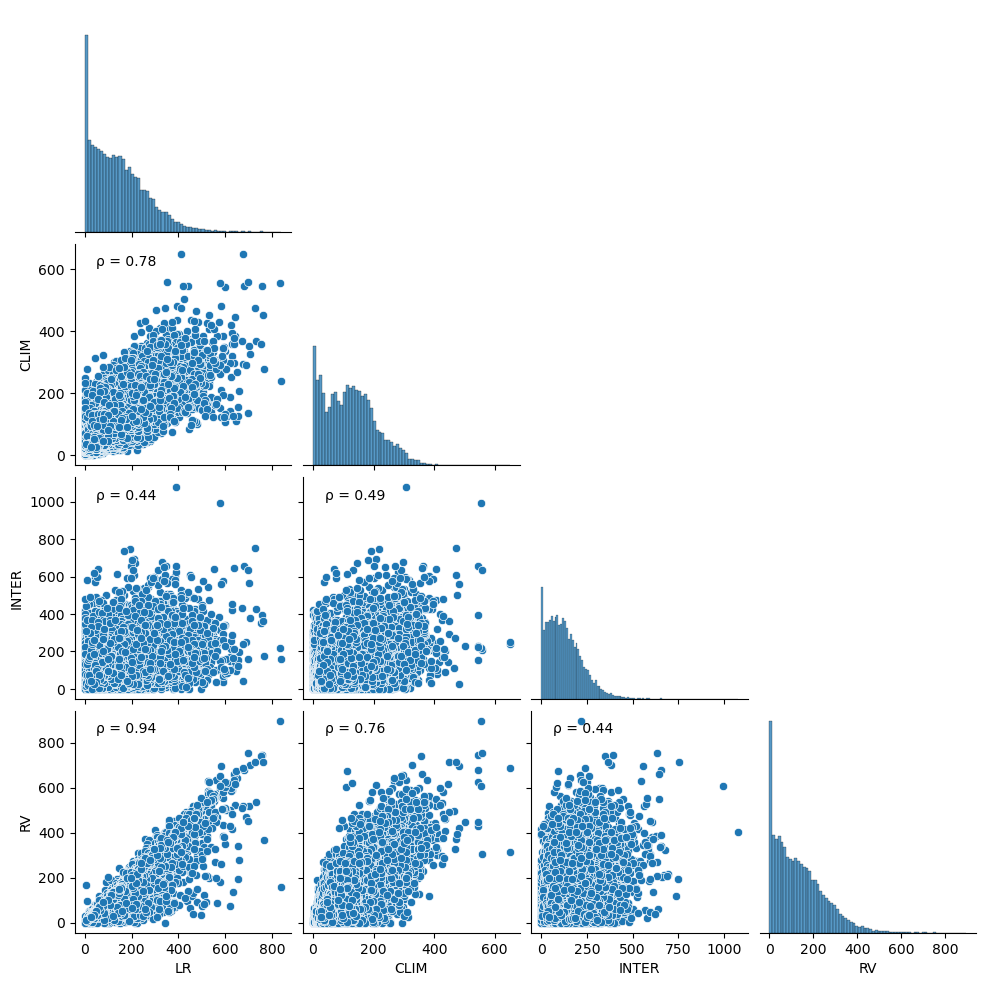

In [72]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(df_na.dropna(), corner=True)
g.map_lower(corrfunc)
plt.show()

# doble mass curve


In [4]:
df_out_drop = pd.read_pickle('df_out_drop.pkl')

In [6]:
df_na = pd.read_pickle('df_na.pkl')

In [7]:
df_filled = df_out_drop.copy()
df_filled['Total'] = df_out_drop['Total'].fillna(df_na['RV'])
df_filled['Total'] = df_filled.groupby(['Code', df_filled.Date.dt.month], group_keys=False)['Total'].apply(lambda x: x.fillna(x.mean()))

In [8]:
df_filled.describe()

Code          Total
count  7.599600e+05  759960.000000
mean   1.989700e+06     124.022088
std    9.216057e+05     111.961053
min    4.700200e+04       0.000000
25%    1.563000e+06      34.300000
50%    2.149002e+06      98.800000
75%    2.448026e+06     184.800000
max    8.361004e+06    1677.100000

In [9]:
def double_mass_curve(row, idx= index_near):
    code = row.Code
    date = row.Date
    indexx = (gdf_filtered_dist['Code'] == code).idxmax()
    val = gdf_filtered_dist.iloc[idx[:, indexx]]['Code'].values
    close = df_filled[(df_filled['Code'].isin(val)) ]
    close = close[close.Date.dt.month == row.Date]
    mean_close = close[close.Code != code].groupby(close.Date).Total.mean()
    stat = gdf_filtered_dist.iloc[[indexx]]
    stations = gdf_filtered_dist[(gdf_filtered_dist.Code.isin(val)) & (gdf_filtered_dist.Code != code)]
    stations['dist'] = 1/(stations['geometry'].apply(lambda x: stat.distance(x)))
    df_stat = close[close.Code == code]
    close = close[close.Code != code]
    close = close.merge(stations[['Code', 'dist']], on='Code')
    mean_close = weighted_mean(close, 'Total', 'dist', 'Date')

    x = mean_close.values
    y = df_stat['Total'].values
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(x, y)
# calculate the line using the model
    yhat = model.predict(x)
    df_stat['predict'] = yhat
    return pd.Series(yhat.squeeze())
#cada mes de cada estação



NameError: name 'index_near' is not defined

In [ ]:
df_cod_dates = df_filled.groupby(['Code', df_filled.Date.dt.month]).mean().reset_index().drop(columns=['Total'])


C:\Users\luisg\AppData\Local\Temp\ipykernel_25824\3357646117.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cod_dates = df_filled.groupby(['Code', df_filled.Date.dt.month]).mean().reset_index().drop(columns=['Total'])


In [ ]:
test = df_cod_dates.apply(double_mass_curve , axis=1)

In [ ]:
df_test = df_filled.copy()
df_test['month'] = df_filled.Date.dt.month


In [ ]:
df_test = df_test.sort_values(by=['Code', 'month'])
df_test['predict'] = test.to_numpy().flatten()
df_test.drop(columns=['month'], inplace=True)

In [86]:
df_test['predict'] = df_test['predict'].clip(0)

In [87]:
df_test['Error'] = (df_test['Total'] - df_test['predict'])/(df_test['Total'] +1)
df_test

Code       Date  Total     predict     Error
0         47002 1981-01-01  250.0  238.095446  0.047429
12        47002 1982-01-01  577.9  503.472080  0.128568
24        47002 1983-01-01   46.0  106.442674 -1.286014
36        47002 1984-01-01  207.8  340.874676 -0.637331
48        47002 1985-01-01  577.9  671.114642 -0.161020
...         ...        ...    ...         ...       ...
759911  8361004 2006-12-01    2.1   22.501083 -6.580994
759923  8361004 2007-12-01   87.1  121.736590 -0.393151
759935  8361004 2008-12-01  363.9  291.146848  0.199378
759947  8361004 2009-12-01   34.7   27.593558  0.199060
759959  8361004 2010-12-01  152.2  102.606745  0.323716

[759960 rows x 5 columns]

In [127]:
df_test[df_test['Error'] == df_test['Error'].min()]

Code       Date  Total     predict       Error
494282  2346066 1981-03-01    0.0  506.834717 -506.834717

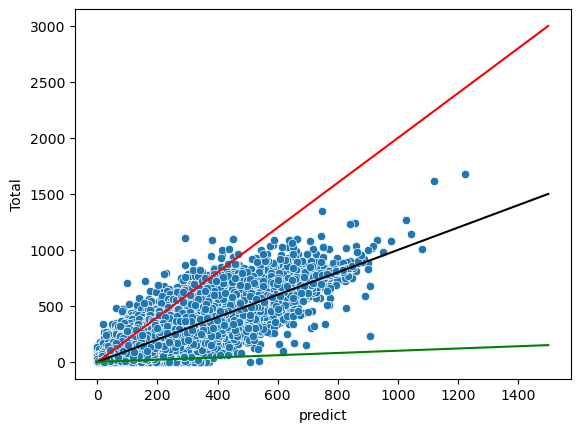

In [95]:
x = np.linspace(0, 1500, 200)
sns.scatterplot(data=df_test, x='predict', y='Total')
plt.plot(x,2*x, color='red')
plt.plot(x,x, color='black')
plt.plot(x,0.1*x, color='green')

## ERROR

In [4]:
df_doblemass = pd.read_pickle('df_doblemass.pkl')

In [14]:
df_doblemass['Error3'] = (df_doblemass['Total'] - df_doblemass['predict']+0.01)/(df_doblemass['Total'] +0.01)


In [47]:
df_doblemass['Error7'] = (df_doblemass['Total'] - df_doblemass['predict'])/(df_doblemass['Total'])


In [43]:
#how many 0 values in each column
df_doblemass.isin([0]).sum()

Code               0
Date               0
Total          58123
predict        19527
Error          16079
doble_mass1    29165
Error3             0
dtype: int64

In [38]:

df_con = df_doblemass
def plot_double_mass(code):
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    df_stat = df_con[df_con.Code== code]
    axes[0].plot(df_stat.Date, df_stat.Total, color='green', label='Total')
    axes[0].plot(df_stat.Date, df_stat.predict, color='red', label='predict')
    #axes[0].plot(df_stat.Date, df_stat.ANA_consist, color='blue', label='ANA_consist')

    axes[0].legend()

    axes[1].scatter(df_stat.Error, df_stat.Error3, color='black', label='doble_mass1')#.#set(xlabel='1', ylabel='3')
    #axes[1].set(xlabel='ANA_consist', ylabel='doble_mass1')

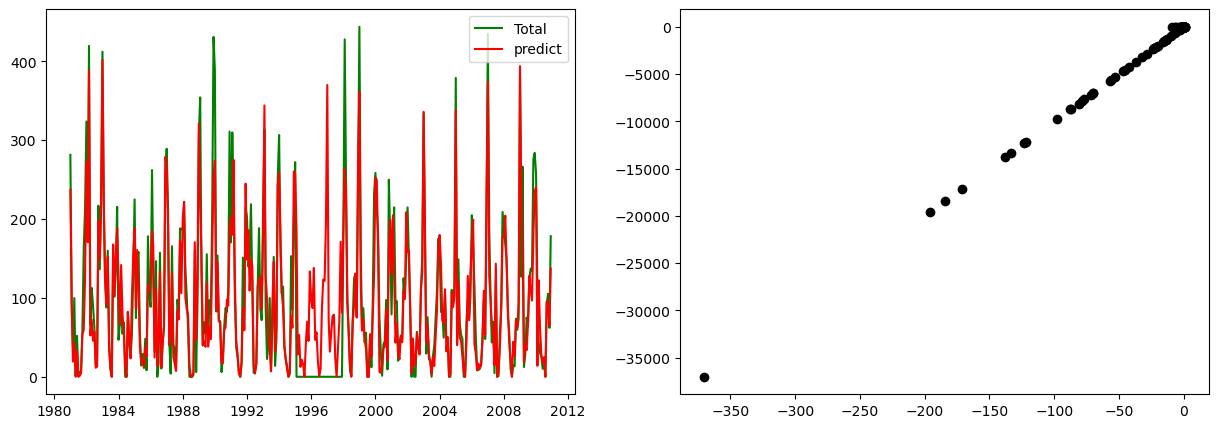

In [39]:
plot_double_mass(2149022)

In [190]:
#df_test.to_pickle('df_doblemass.pkl')

## test

In [8]:
df_doblemass[['Total', 'predict', 'Error', 'doble_mass1']]

Total     predict     Error  doble_mass1
0       250.000000  238.095446  0.047429   250.000000
1       448.114159  433.323818  0.032932   448.114159
2       207.700000  371.002201 -0.782473   207.700000
3       112.000000  258.155018 -1.293407   258.155018
4       444.200000  436.344451  0.017645   444.200000
...            ...         ...       ...          ...
759955  290.100000  191.201159  0.339742   290.100000
759956  129.000000   80.640316  0.371998   129.000000
759957  118.900000   70.688170  0.402100   118.900000
759958  301.200000  197.045806  0.344653   301.200000
759959  152.200000  102.606745  0.323716   152.200000

[759960 rows x 4 columns]

In [9]:
df_cod_dates = df_doblemass.groupby(['Code', df_doblemass.Date.dt.month]).mean().reset_index().drop(columns=['Total', 'predict', 'Error', 'doble_mass1'])


C:\Users\luisg\AppData\Local\Temp\ipykernel_28000\3668790549.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cod_dates = df_doblemass.groupby(['Code', df_doblemass.Date.dt.month]).mean().reset_index().drop(columns=['Total', 'predict', 'Error', 'doble_mass1'])


In [ ]:
#547

In [54]:
codigo = df_cod_dates.loc[[55]].Code.values[0]
df_stat = df_doblemass[df_doblemass.Code == codigo]
row = df_stat.iloc[1]
code = row.Code
date = row.Date

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Text(0.5, 0, 'média')

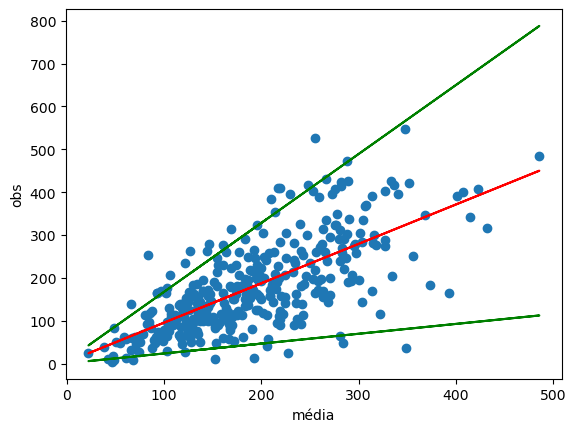

In [128]:
indexx = (gdf_filtered_dist['Code'] == code).idxmax()
val = gdf_filtered_dist.iloc[index_near[:, indexx]]['Code'].values
close = df_doblemass[(df_doblemass['Code'].isin(val)) ]
#close = close[close.Date.dt.month == row.Date.month]
stat = gdf_filtered_dist.iloc[[indexx]]
stations = gdf_filtered_dist[(gdf_filtered_dist.Code.isin(val)) & (gdf_filtered_dist.Code != code)]
stations['dist'] = 1/(stations['geometry'].apply(lambda x: stat.distance(x).values[0]))
df_stat = close[close.Code == code]
close = close[close.Code != code]
close = close.merge(stations[['Code', 'dist']], on='Code')
mean_close = weighted_mean(close, 'Total', 'dist', 'Date')
x = mean_close.values
y = df_stat['Total'].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
# calculate the line using the model
yhat = model.predict(x)
# plot the data and the model prediction
plt.scatter(x, y)
plt.plot(x, yhat, color='red')
plt.plot(x, yhat*1.75, color='green')
plt.plot(x, yhat*0.25, color='green')
plt.ylabel('obs')
plt.xlabel('média')

In [65]:
#true if the value is between the two values of the interval (a,b)
def between(a,b,x):
    return (x >= a) & (x <= b)



## between

In [72]:
between(yhat*0.25, yhat*1.75, y)

25

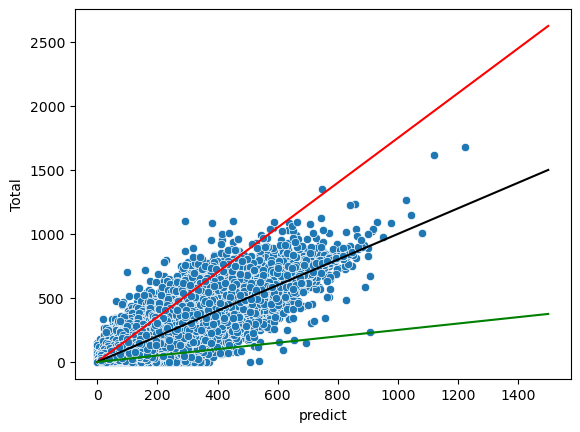

In [78]:
x = np.linspace(0, 1500, 200)
sns.scatterplot(data=df_doblemass, x='predict', y='Total')
plt.plot(x,1.75*x, color='red')
plt.plot(x,x, color='black')
plt.plot(x,0.25*x, color='green')

In [127]:
#calculate the % of values that are between the interval
between(df_doblemass['predict']*0.25, df_doblemass['predict']*1.75, df_doblemass['Total']).sum()/len(df_doblemass)

0.8723919679983158

In [73]:
def between_consistency(row, inf=0.25, sup=1.75):
    value = 0
    if between(row['predict']*inf, row['predict']*sup, row['Total']):
        value = row['Total']
    else:
        value = row['predict']
    return value        

In [74]:
df_doblemass['between'] = df_doblemass.apply(between_consistency, axis=1)

In [75]:
df_doblemass

Code       Date       Total     predict     Error  doble_mass1  \
0         47002 1981-01-01  250.000000  238.095446  0.047429   250.000000   
1         47002 1981-02-01  448.114159  433.323818  0.032932   448.114159   
2         47002 1981-03-01  207.700000  371.002201 -0.782473   207.700000   
3         47002 1981-04-01  112.000000  258.155018 -1.293407   258.155018   
4         47002 1981-05-01  444.200000  436.344451  0.017645   444.200000   
...         ...        ...         ...         ...       ...          ...   
759955  8361004 2010-08-01  290.100000  191.201159  0.339742   290.100000   
759956  8361004 2010-09-01  129.000000   80.640316  0.371998   129.000000   
759957  8361004 2010-10-01  118.900000   70.688170  0.402100   118.900000   
759958  8361004 2010-11-01  301.200000  197.045806  0.344653   301.200000   
759959  8361004 2010-12-01  152.200000  102.606745  0.323716   152.200000   

           between  
0       250.000000  
1       448.114159  
2       207.700000  
3       112.000000  
4       444.200000  
...            ...  
759955  290.100000  
759956  129.000000  
759957  118.900000  
759958  301.200000  
759959  152.200000  

[759960 rows x 7 columns]

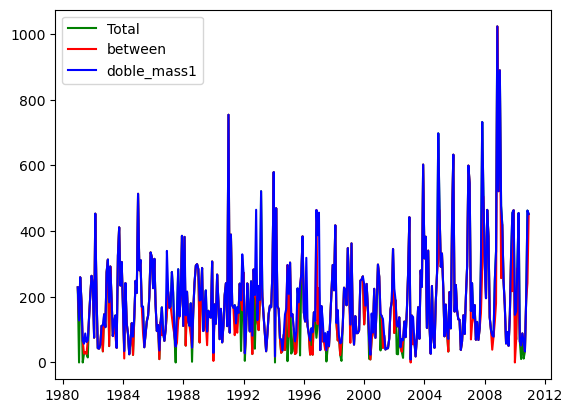

In [77]:
df_stat = df_doblemass[df_doblemass['Code'] == 2242006 ]
plt.plot(df_stat['Date'], df_stat['Total'], color='green', label='Total')
plt.plot(df_stat['Date'], df_stat['between'], color='red', label='between')
plt.plot(df_stat['Date'], df_stat['doble_mass1'],   color='blue', label='doble_mass1')
plt.legend()

In [165]:
df_con = df_10[df_10.Consistency ==2]
df_con = df_con[df_con.Code.isin(df_doblemass.Code.unique())]
df_con = df_con.set_index(['Code','Date']).unstack().stack(dropna=False).reset_index()
df_doblemass.sort_values(by=['Code', 'Date'], inplace=True)
df_doblemass.reset_index(inplace=True, drop = True)


In [166]:
df_con = df_con.merge(df_doblemass, on=['Code', 'Date'], how='left')
df_con.rename(columns={'Total_x':'ANA_consist', 'Total_y':'na_filled'}, inplace=True)
#df_con.drop(columns=['Consistency', 'Error'], inplace=True)
def plot_double_mass(code):
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    df_stat = df_con[df_con.Code== code]
    axes[0].plot(df_stat.Date, df_stat.na_filled, color='red', label='na_filled')
    axes[0].plot(df_stat.Date, df_stat.between, color='green', label='doble_mass1')
    axes[0].plot(df_stat.Date, df_stat.ANA_consist, color='blue', label='ANA_consist')

    axes[0].legend()

    axes[1].scatter(df_stat.ANA_consist, df_stat.between, color='black', label='scatter')#.set(xlabel='ANA_consist', ylabel='doble_mass1')
    axes[1].set(xlabel='ANA_consist', ylabel='between')

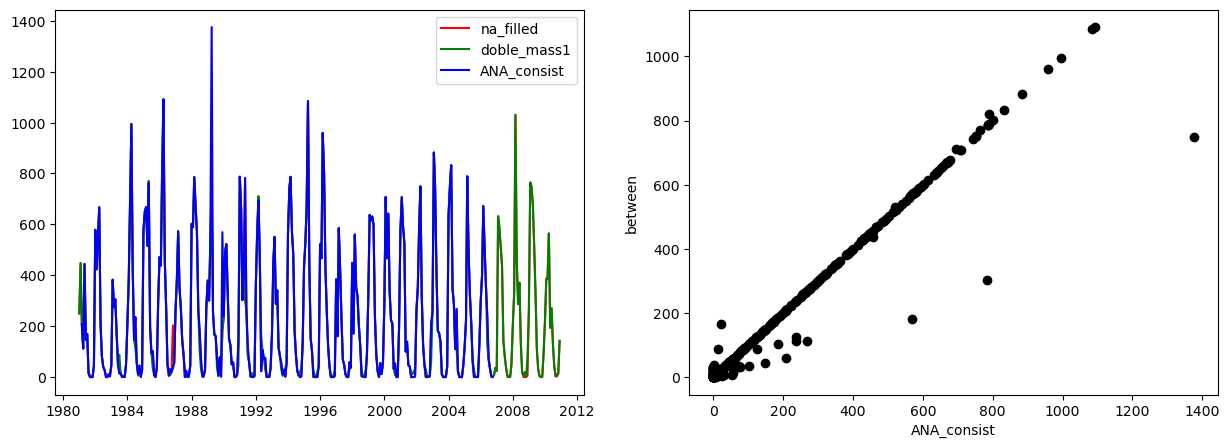

In [167]:
#plot_double_mass(2246033)
plot_double_mass(47002)

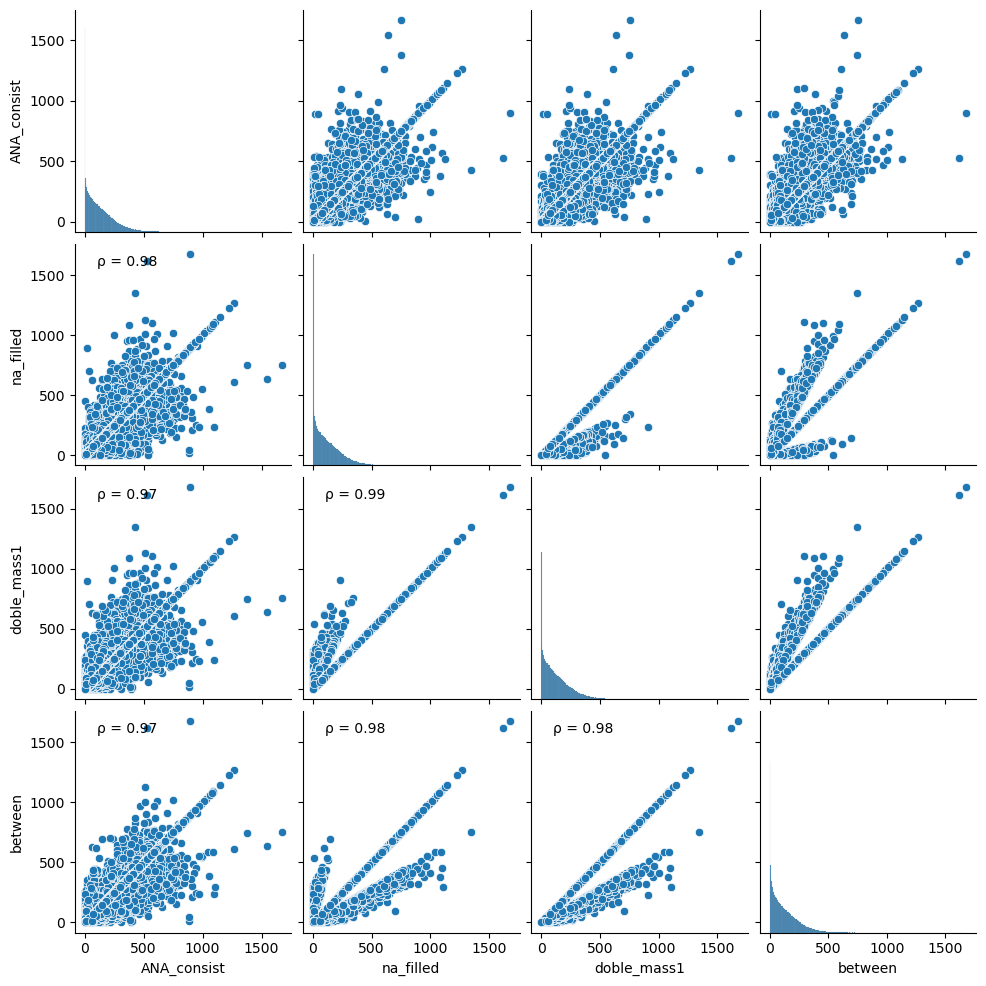

In [95]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(df_con[['ANA_consist', 'na_filled', 'doble_mass1', 'between']].dropna())
g.map_lower(corrfunc)
plt.show()


<AxesSubplot: xlabel='between', ylabel='doble_mass1'>

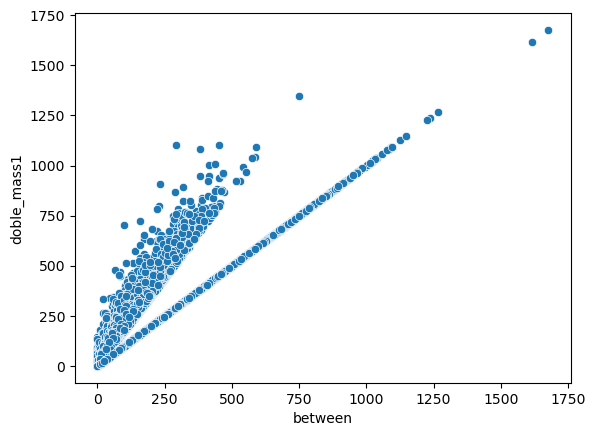

In [96]:
sns.scatterplot(data=df_doblemass, x='between', y='doble_mass1')

<AxesSubplot: xlabel='between', ylabel='Count'>

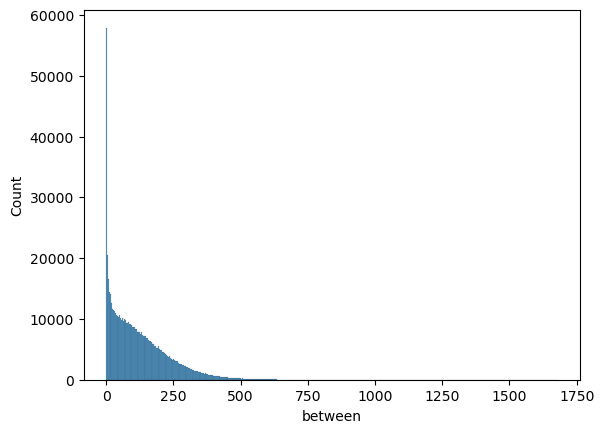

In [106]:
sns.histplot(data=df_doblemass, x='between')

<AxesSubplot: xlabel='between', ylabel='Density'>

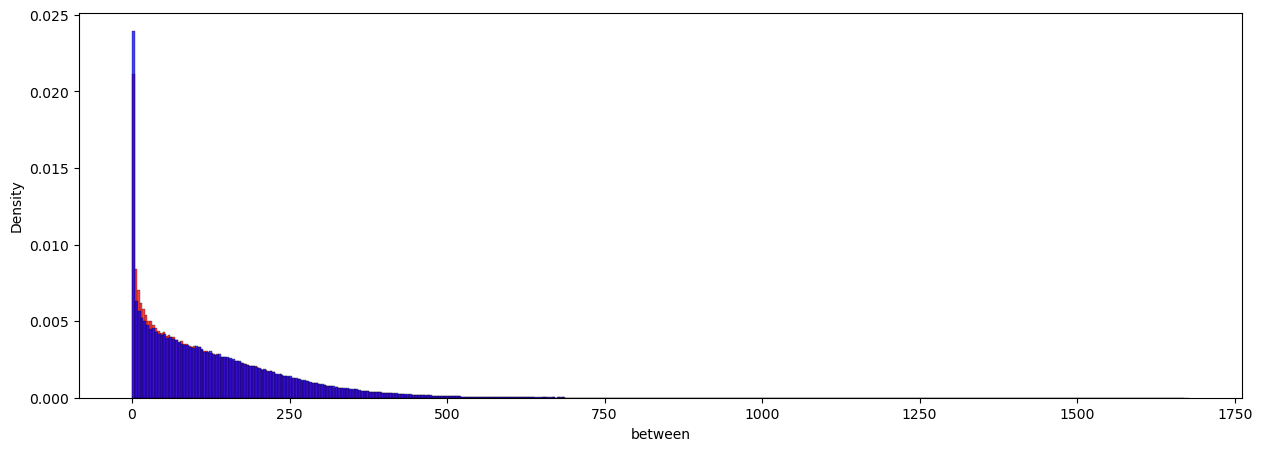

In [123]:
fig, axes = plt.subplots(1,1, figsize=(15,5))
sns.histplot(data=df_con, x='between', ax=axes, stat='density', color='red')
sns.histplot(data=df_con, x='ANA_consist', ax=axes,stat='density', color='blue')

In [177]:
df_between = df_doblemass[['Code', 'Date', 'between']]
df_between.rename(columns={'between':'Total'}, inplace=True)
df_between

C:\Users\luisg\AppData\Local\Temp\ipykernel_28000\2583538409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_between.rename(columns={'between':'Total'}, inplace=True)


Code       Date       Total
0         47002 1981-01-01  250.000000
1         47002 1981-02-01  448.114159
2         47002 1981-03-01  207.700000
3         47002 1981-04-01  112.000000
4         47002 1981-05-01  444.200000
...         ...        ...         ...
759955  8361004 2010-08-01  290.100000
759956  8361004 2010-09-01  129.000000
759957  8361004 2010-10-01  118.900000
759958  8361004 2010-11-01  301.200000
759959  8361004 2010-12-01  152.200000

[759960 rows x 3 columns]

In [176]:
df_between.to_csv('between.csv', index=False)

## between all

In [ ]:
def double_mass_curve2(row, idx= index_near):
    code = row.Code
    date = row.Date
    indexx = (gdf_filtered_dist['Code'] == code).idxmax()
    val = gdf_filtered_dist.iloc[idx[:, indexx]]['Code'].values
    close = df_doblemass[(df_doblemass['Code'].isin(val))]
    #close = close[close.Date.dt.month == row.Date]
    stat = gdf_filtered_dist.iloc[[indexx]]
    stations = gdf_filtered_dist[(gdf_filtered_dist.Code.isin(val)) & (gdf_filtered_dist.Code != code)]
    stations['dist'] = 1/(stations['geometry'].apply(lambda x: stat.distance(x)))
    df_stat = close[close.Code == code]
    close = close[close.Code != code]
    close = close.merge(stations[['Code', 'dist']], on='Code')
    mean_close = weighted_mean(close, 'Total', 'dist', 'Date')

    x = mean_close.values
    y = df_stat['Total'].values
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(x, y)
# calculate the line using the model
    yhat = model.predict(x)
    df_stat['predict'] = yhat
    return pd.Series(yhat.squeeze())

In [133]:
test = df_cod_dates.apply(double_mass_curve2 , axis=1)

In [148]:
#get 12 in 12 rows of test
test2 = test.iloc[::12]


In [155]:
df_doblemass['month'] = df_doblemass.Date.dt.month
df_doblemass = df_doblemass.sort_values(by=['Code', 'Date'])
df_doblemass['predict2'] = test2.to_numpy().flatten()
df_doblemass.drop(columns=['month'], inplace=True)
df_doblemass['predict2'] = df_doblemass['predict2'].clip(0)

In [156]:
df_doblemass

Code       Date       Total     predict     Error  doble_mass1  \
0         47002 1981-01-01  250.000000  238.095446  0.047429   250.000000   
1         47002 1981-02-01  448.114159  433.323818  0.032932   448.114159   
2         47002 1981-03-01  207.700000  371.002201 -0.782473   207.700000   
3         47002 1981-04-01  112.000000  258.155018 -1.293407   258.155018   
4         47002 1981-05-01  444.200000  436.344451  0.017645   444.200000   
...         ...        ...         ...         ...       ...          ...   
759955  8361004 2010-08-01  290.100000  191.201159  0.339742   290.100000   
759956  8361004 2010-09-01  129.000000   80.640316  0.371998   129.000000   
759957  8361004 2010-10-01  118.900000   70.688170  0.402100   118.900000   
759958  8361004 2010-11-01  301.200000  197.045806  0.344653   301.200000   
759959  8361004 2010-12-01  152.200000  102.606745  0.323716   152.200000   

           between    predict2  
0       250.000000  235.324365  
1       448.114159  349.499841  
2       207.700000  173.743212  
3       112.000000  242.268317  
4       444.200000  475.054167  
...            ...         ...  
759955  290.100000  203.945739  
759956  129.000000  110.923616  
759957  118.900000   74.390054  
759958  301.200000  167.239183  
759959  152.200000   92.800126  

[759960 rows x 8 columns]

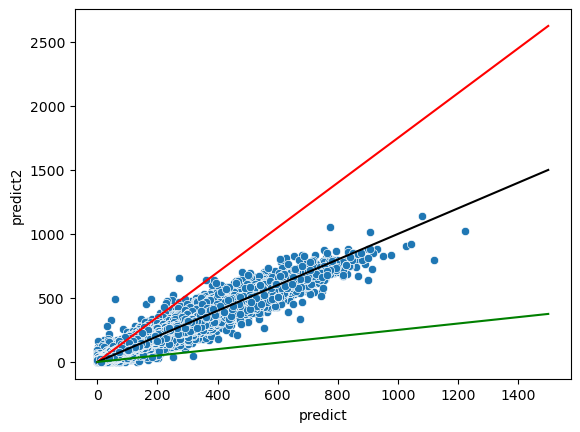

In [172]:
#compare predict and predict2
sns.scatterplot(data=df_doblemass, x='predict', y='predict2')
plt.plot(x,1.75*x, color='red')
plt.plot(x,x, color='black')
plt.plot(x,0.25*x, color='green')

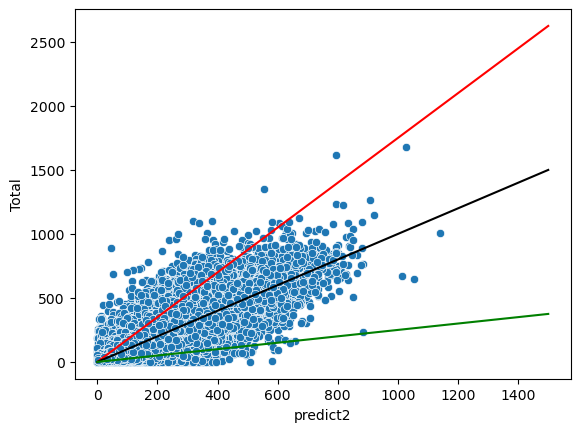

In [158]:
x = np.linspace(0, 1500, 200)
sns.scatterplot(data=df_doblemass, x='predict2', y='Total')
plt.plot(x,1.75*x, color='red')
plt.plot(x,x, color='black')
plt.plot(x,0.25*x, color='green')

In [159]:
between(df_doblemass['predict2']*0.25, df_doblemass['predict2']*1.75, df_doblemass['Total']).sum()/len(df_doblemass)

0.8664850781620085

In [160]:
def between_consistency2(row, inf=0.25, sup=1.75):
    value = 0
    if between(row['predict2']*inf, row['predict2']*sup, row['Total']):
        value = row['Total']
    else:
        value = row['predict2']
    return value        

In [161]:
df_doblemass['between2'] = df_doblemass.apply(between_consistency2, axis=1)

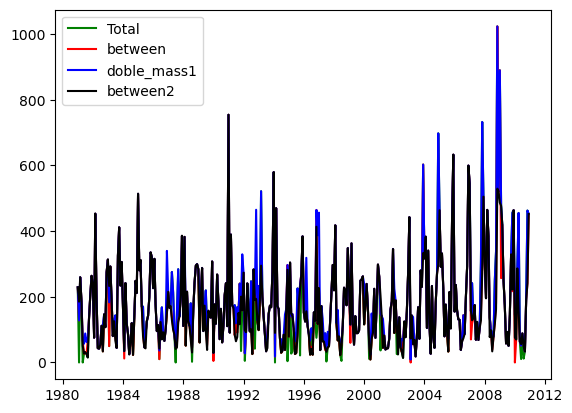

In [162]:
df_stat = df_doblemass[df_doblemass['Code'] == 2242006 ]
plt.plot(df_stat['Date'], df_stat['Total'], color='green', label='Total')
plt.plot(df_stat['Date'], df_stat['between'], color='red', label='between')
plt.plot(df_stat['Date'], df_stat['doble_mass1'],   color='blue', label='doble_mass1')
plt.plot(df_stat['Date'], df_stat['between2'],   color='black', label='between2')
plt.legend()

In [168]:
df_con = df_10[df_10.Consistency ==2]
df_con = df_con[df_con.Code.isin(df_doblemass.Code.unique())]
df_con = df_con.set_index(['Code','Date']).unstack().stack(dropna=False).reset_index()
df_doblemass.sort_values(by=['Code', 'Date'], inplace=True)
df_doblemass.reset_index(inplace=True, drop = True)
df_con = df_con.merge(df_doblemass, on=['Code', 'Date'], how='left')
df_con.rename(columns={'Total_x':'ANA_consist', 'Total_y':'na_filled'}, inplace=True)
#df_con.drop(columns=['Consistency', 'Error'], inplace=True)
def plot_double_mass2(code):
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    df_stat = df_con[df_con.Code== code]
    axes[0].plot(df_stat.Date, df_stat.na_filled, color='red', label='na_filled')
    axes[0].plot(df_stat.Date, df_stat.between2, color='green', label='between2')
    axes[0].plot(df_stat.Date, df_stat.ANA_consist, color='blue', label='ANA_consist')

    axes[0].legend()

    axes[1].scatter(df_stat.ANA_consist, df_stat.between2, color='black', label='scatter')#.set(xlabel='ANA_consist', ylabel='doble_mass1')
    axes[1].set(xlabel='ANA_consist', ylabel='between2')

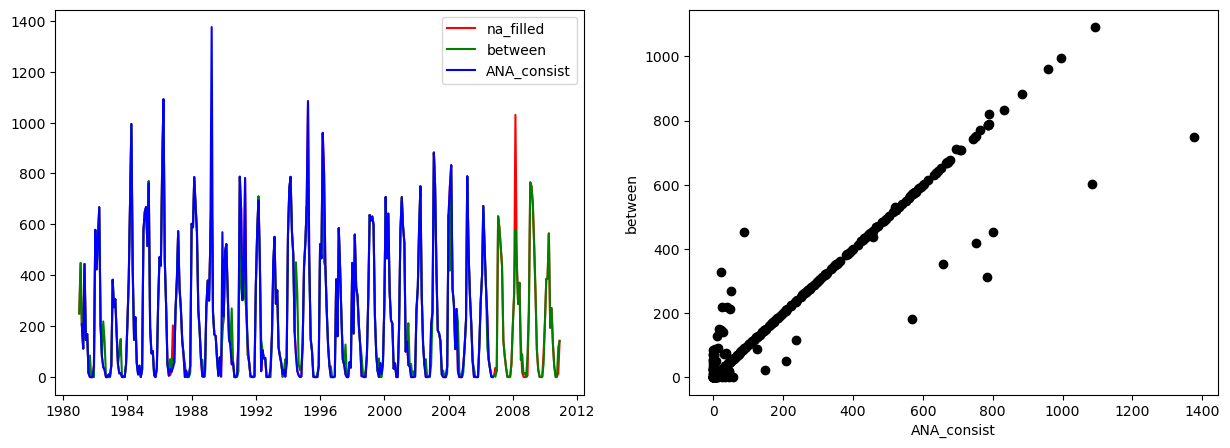

In [169]:
plot_double_mass2(47002)

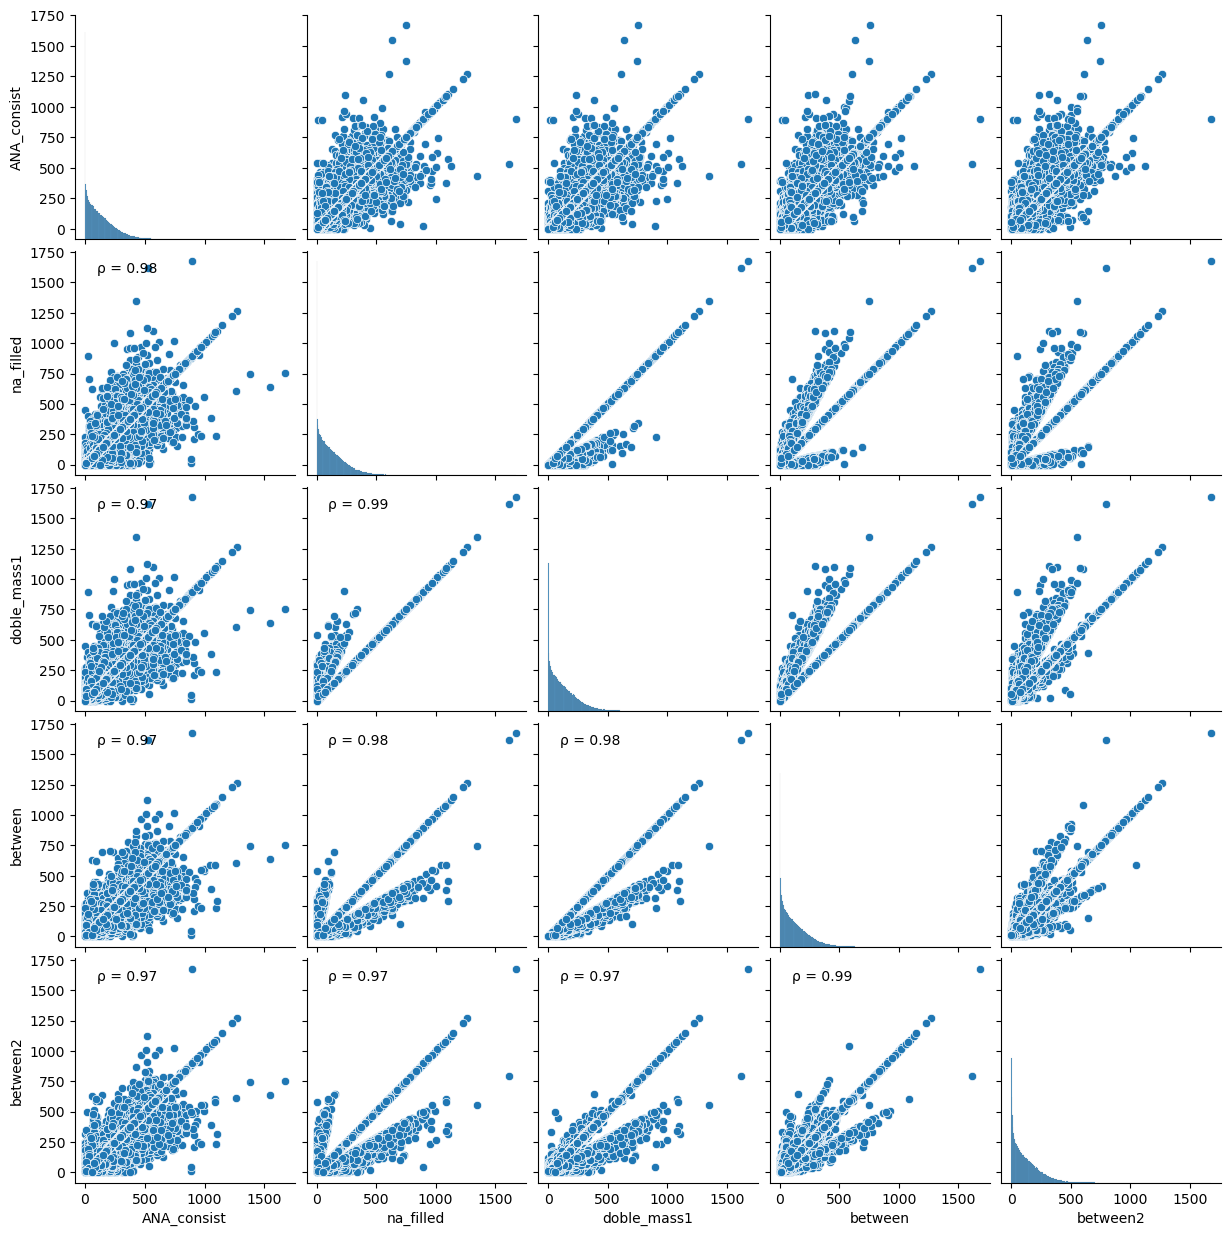

In [170]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(df_con[['ANA_consist', 'na_filled', 'doble_mass1', 'between','between2']].dropna())
g.map_lower(corrfunc)
plt.show()


<AxesSubplot: xlabel='between2', ylabel='Density'>

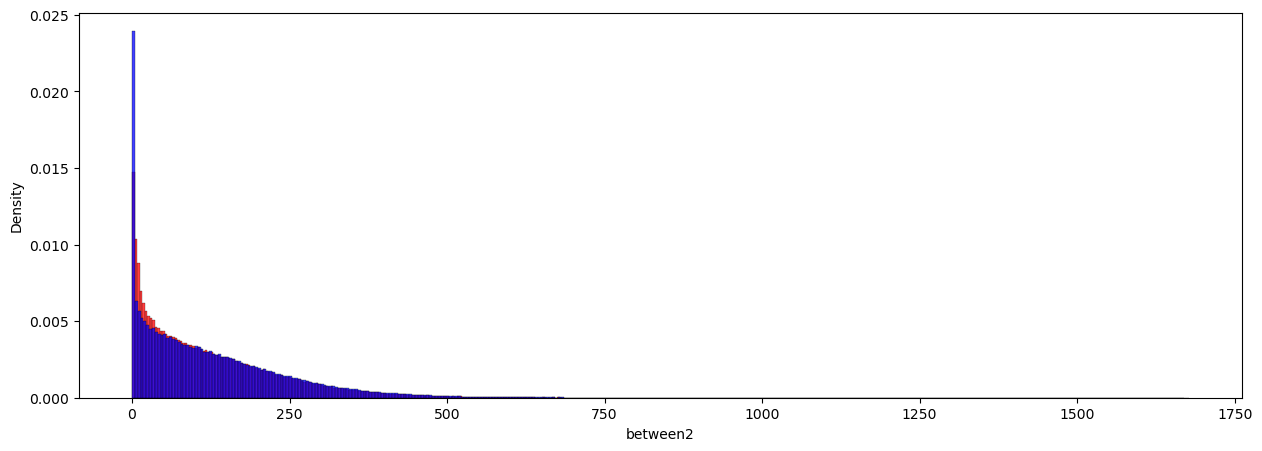

In [171]:
fig, axes = plt.subplots(1,1, figsize=(15,5))
sns.histplot(data=df_con, x='between2', ax=axes, stat='density', color='red')
sns.histplot(data=df_con, x='ANA_consist', ax=axes,stat='density', color='blue')

# consistency

In [4]:
#df_doblemass = df_test.sort_index()
df_doblemass = pd.read_pickle('df_doblemass.pkl')

In [5]:
def double_mass_limit(row, limit= 1):
    value = 0
    if abs(row['Error']) > limit:
        value = row['predict']
    else:
        value = row['Total']
    return value

In [ ]:
df_doblemass['doble_mass1'] = df_doblemass.apply(double_mass_limit, axis=1)
#df_doblemass.to_pickle('df_doblemass.pkl')

In [7]:
df_doblemass['Error2'] = (df_doblemass['Total'] - df_doblemass['predict'])/(df_doblemass['predict'] +1)


In [8]:
def double_mass_limit2(row, limit= 1):
    value = 0
    if abs(row['Error2']) > limit:
        value = row['predict']
    else:
        value = row['Total']
    return value

In [9]:
df_doblemass['doble_mass2'] = df_doblemass.apply(double_mass_limit2, axis=1)


In [10]:
df_doblemass[df_doblemass.Error2.abs() > 2]

Code       Date  Total    predict     Error  doble_mass1  \
70        47002 1986-11-01  203.2  37.782029  0.810078        203.2   
80        47002 1987-09-01   24.8   3.775862  0.814889         24.8   
82        47002 1987-11-01    8.6   0.000000  0.895833          8.6   
119       47002 1990-12-01  147.9  44.812893  0.692324        147.9   
225       47002 1999-10-01   55.3  11.188562  0.783507         55.3   
...         ...        ...    ...        ...       ...          ...   
759687  8361004 1988-04-01    2.5   0.000000  0.714286          2.5   
759699  8361004 1989-04-01    6.2   0.000000  0.861111          6.2   
759707  8361004 1989-12-01   25.2   0.000000  0.961832         25.2   
759800  8361004 1997-09-01   27.3   3.578274  0.838224         27.3   
759890  8361004 2005-03-01   57.7  11.527243  0.786589         57.7   

           Error2  doble_mass2  
70       4.265325    37.782029  
80       4.402166     3.775862  
82       8.600000     0.000000  
119      2.250177    44.812893  
225      3.619085    11.188562  
...           ...          ...  
759687   2.500000     0.000000  
759699   6.200000     0.000000  
759707  25.200000     0.000000  
759800   5.181369     3.578274  
759890   3.685788    11.527243  

[8528 rows x 8 columns]

In [11]:
df_doblemass.sort_values(by='Error', ascending=False)

Code       Date  Total     predict       Error  doble_mass1  \
403188  2242006 2010-01-01  145.0    0.000000    0.993151   145.000000   
443885  2247055 1981-06-01  135.1    0.000000    0.992652   135.100000   
692290  2748017 1981-11-01  132.0    0.000000    0.992481   132.000000   
496082  2346094 1981-03-01   95.1    0.000000    0.989594    95.100000   
616019  2548042 1985-12-01   91.1    0.000000    0.989142    91.100000   
...         ...        ...    ...         ...         ...          ...   
494291  2346066 1981-12-01    0.0  344.008370 -344.008370   344.008370   
369048  2148001 1985-01-01    0.0  351.107477 -351.107477   351.107477   
494283  2346066 1981-04-01    0.0  363.154201 -363.154201   363.154201   
382152  2149022 1997-01-01    0.0  370.100284 -370.100284   370.100284   
494282  2346066 1981-03-01    0.0  506.834717 -506.834717   506.834717   

            Error2  doble_mass2  
403188  145.000000          0.0  
443885  135.100000          0.0  
692290  132.000000          0.0  
496082   95.100000          0.0  
616019   91.100000          0.0  
...            ...          ...  
494291   -0.997102          0.0  
369048   -0.997160          0.0  
494283   -0.997254          0.0  
382152   -0.997305          0.0  
494282   -0.998031          0.0  

[759960 rows x 8 columns]

In [12]:
df_stat.sort_values(by='Error', ascending=False).head(40)

NameError: name 'df_stat' is not defined

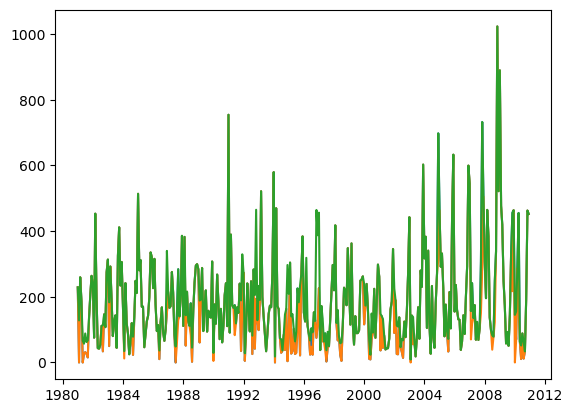

In [71]:
df_stat = df_doblemass[df_doblemass['Code'] == 2242006 ]
plt.plot(df_stat['Date'], df_stat['Total'])
plt.plot(df_stat['Date'], df_stat['doble_mass2'])
plt.plot(df_stat['Date'], df_stat['doble_mass1'])

In [72]:
df_con = df_10[df_10.Consistency ==2]
df_con = df_con[df_con.Code.isin(df_doblemass.Code.unique())]
df_con = df_con.set_index(['Code','Date']).unstack().stack(dropna=False).reset_index()

In [73]:
df_doblemass.sort_values(by=['Code', 'Date'], inplace=True)
df_doblemass.reset_index(inplace=True, drop = True)
df_con = df_con.merge(df_doblemass, on=['Code', 'Date'], how='left')
df_con.rename(columns={'Total_x':'ANA_consist', 'Total_y':'na_filled'}, inplace=True)
df_con.drop(columns=['Consistency', 'Error'], inplace=True)

In [24]:
def plot_double_mass(code):
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    df_stat = df_con[df_con.Code== code]
    axes[0].plot(df_stat.Date, df_stat.na_filled, color='red', label='na_filled')
    axes[0].plot(df_stat.Date, df_stat.doble_mass1, color='green', label='doble_mass1')
    axes[0].plot(df_stat.Date, df_stat.ANA_consist, color='blue', label='ANA_consist')

    axes[0].legend()

    axes[1].scatter(df_stat.ANA_consist, df_stat.doble_mass1, color='black', label='doble_mass1')#.set(xlabel='ANA_consist', ylabel='doble_mass1')
    axes[1].set(xlabel='ANA_consist', ylabel='doble_mass1')

In [37]:
#df_con.to_pickle('df_con.pkl')
df_con = pd.read_pickle('df_con.pkl')
df_con

Code       Date  ANA_consist   na_filled     predict  doble_mass1
0         47002 1981-01-01        250.0  250.000000  238.095446   250.000000
1         47002 1981-02-01          NaN  448.114159  433.323818   448.114159
2         47002 1981-03-01        207.7  207.700000  371.002201   207.700000
3         47002 1981-04-01        112.0  112.000000  258.155018   258.155018
4         47002 1981-05-01        444.2  444.200000  436.344451   444.200000
...         ...        ...          ...         ...         ...          ...
434155  8361004 2010-08-01          NaN  290.100000  191.201159   290.100000
434156  8361004 2010-09-01          NaN  129.000000   80.640316   129.000000
434157  8361004 2010-10-01          NaN  118.900000   70.688170   118.900000
434158  8361004 2010-11-01          NaN  301.200000  197.045806   301.200000
434159  8361004 2010-12-01          NaN  152.200000  102.606745   152.200000

[434160 rows x 6 columns]

AttributeError: 'DataFrame' object has no attribute 'doble_mass1'

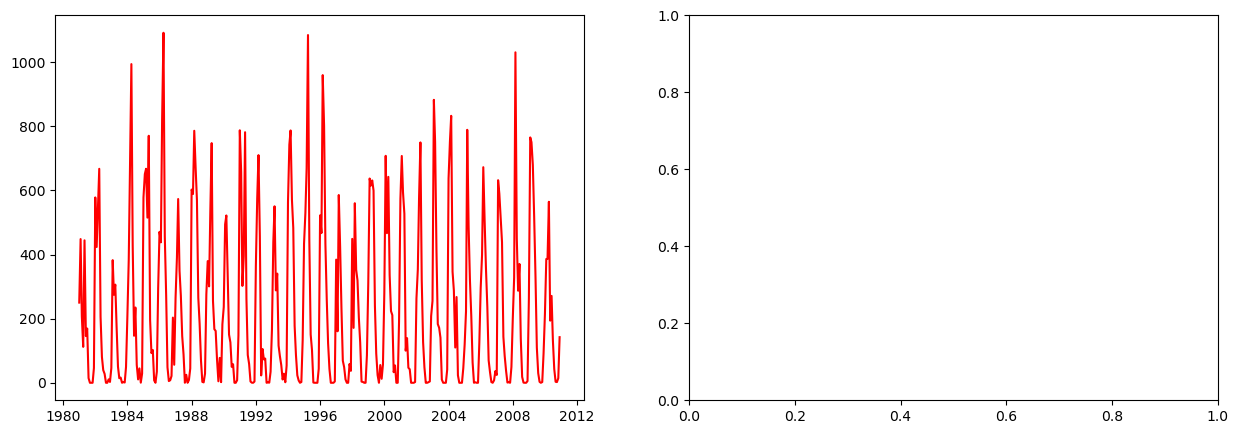

In [86]:
plot_double_mass(47002)

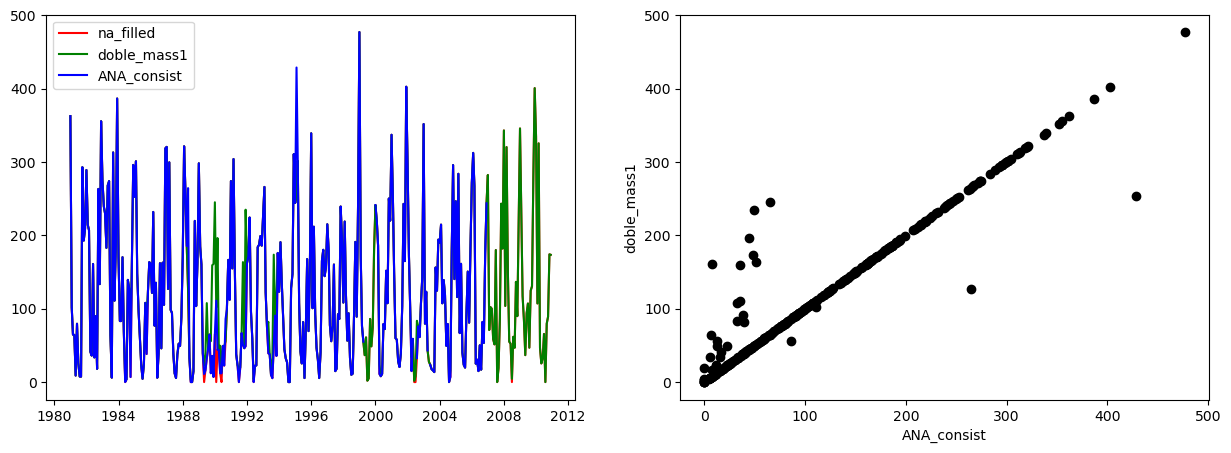

In [115]:
plot_double_mass(2246033)
plot_double_mass(47002)

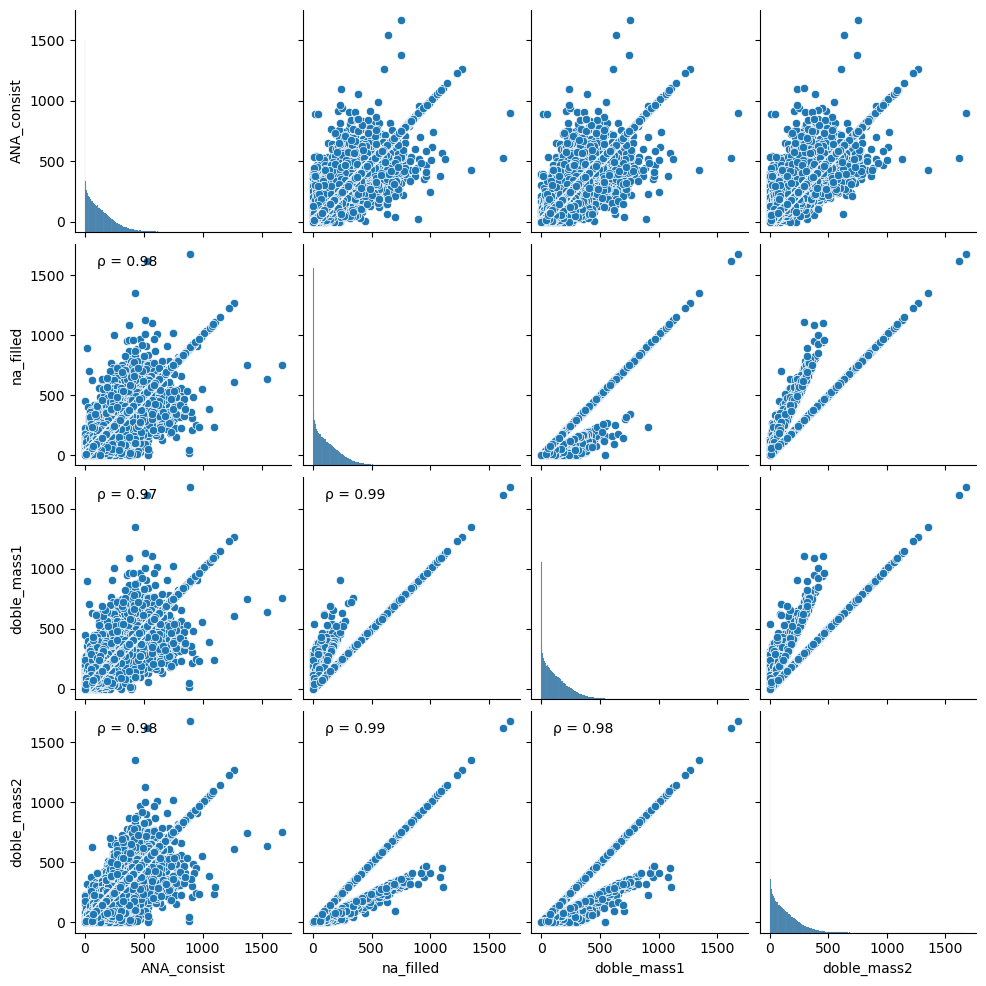

In [75]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(df_con[['ANA_consist', 'na_filled', 'doble_mass1', 'doble_mass2']].dropna())
g.map_lower(corrfunc)
plt.show()


<AxesSubplot: xlabel='doble_mass2', ylabel='doble_mass1'>

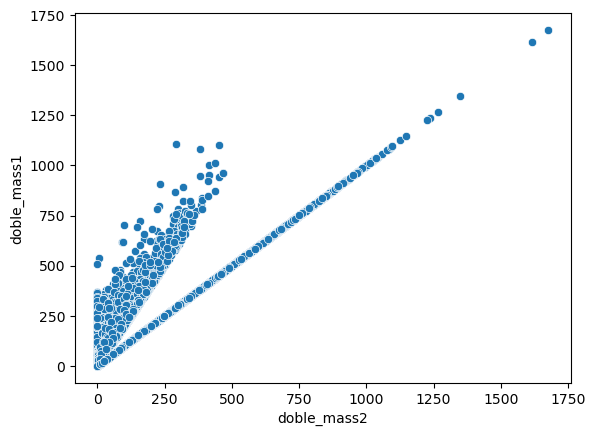

In [81]:
sns.scatterplot(data=df_doblemass, x='doble_mass2', y='doble_mass1')

In [77]:
df_raw = df_10[df_10.Consistency ==1]

In [78]:
df_compare = df_raw.merge(df_con, on=['Code', 'Date'], how='left')


In [79]:
df_diff = df_compare[~(df_compare.Total == df_compare.ANA_consist)].dropna()
df_diff.rename(columns={'Total':'ANA_raw'}, inplace=True)

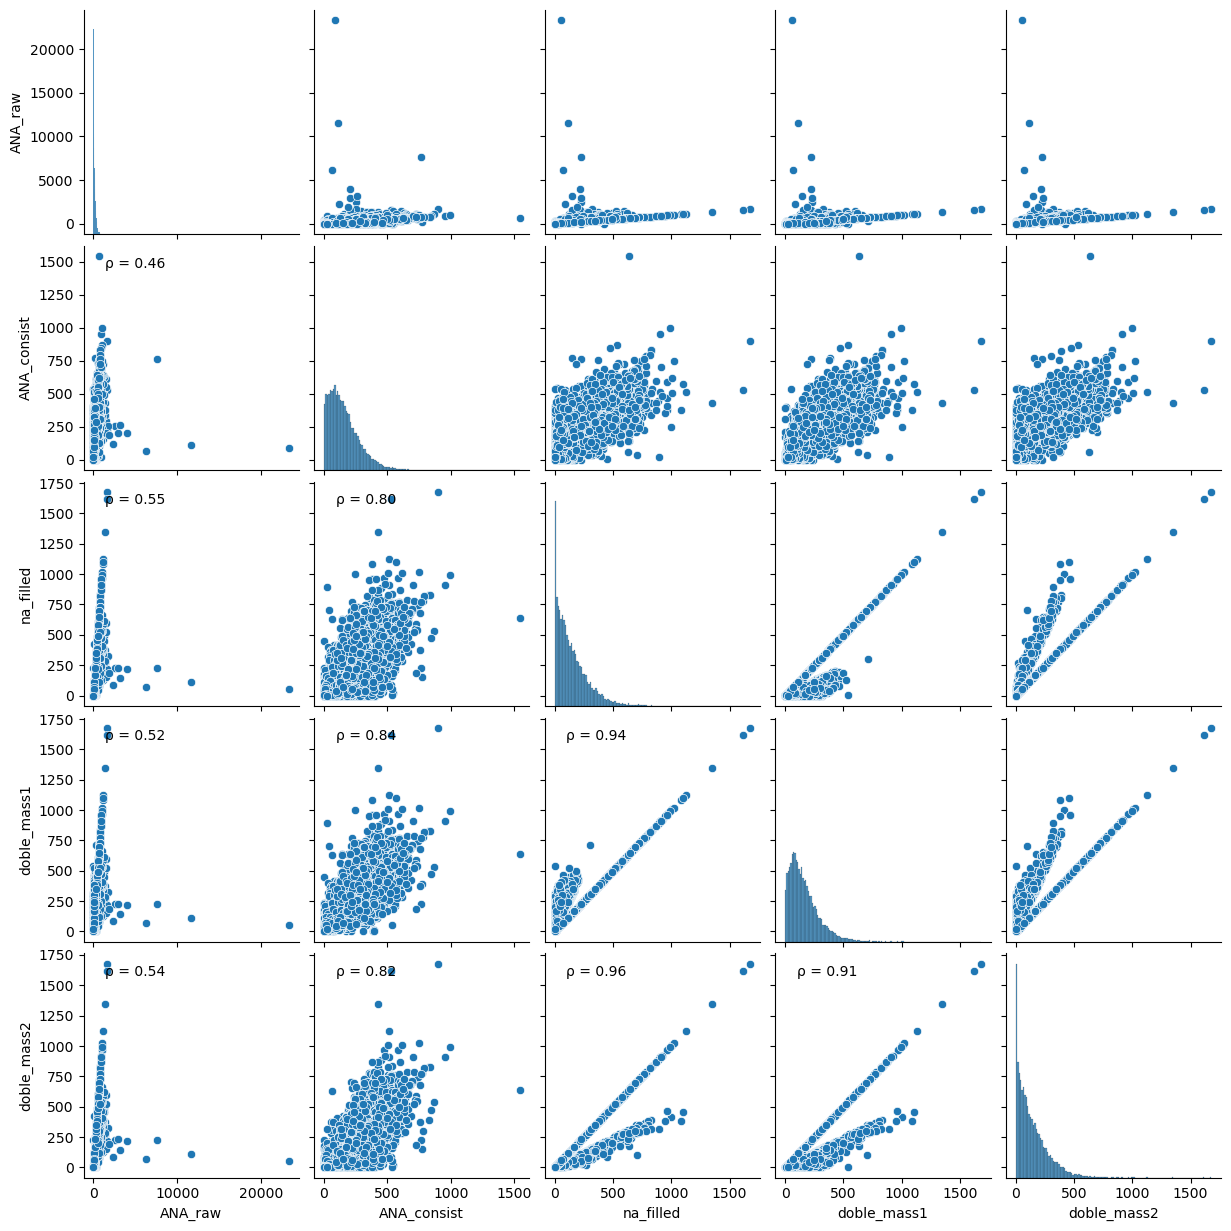

In [80]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(df_diff[['ANA_raw', 'ANA_consist', 'na_filled', 'doble_mass1', 'doble_mass2']].dropna())
g.map_lower(corrfunc)
plt.show()


In [76]:
sns.histplot(df_diff[['ANA_raw', 'ANA_consist', 'na_filled', 'doble_mass1', 'doble_mass2']], color='blue', stat='density')
plt.xlim(0, 1500)

NameError: name 'df_diff' is not defined

In [89]:
df_doblemass

Code       Date       Total     predict     Error  doble_mass1  \
0         47002 1981-01-01  250.000000  238.095446  0.047429   250.000000   
1         47002 1981-02-01  448.114159  433.323818  0.032932   448.114159   
2         47002 1981-03-01  207.700000  371.002201 -0.782473   207.700000   
3         47002 1981-04-01  112.000000  258.155018 -1.293407   258.155018   
4         47002 1981-05-01  444.200000  436.344451  0.017645   444.200000   
...         ...        ...         ...         ...       ...          ...   
759955  8361004 2010-08-01  290.100000  191.201159  0.339742   290.100000   
759956  8361004 2010-09-01  129.000000   80.640316  0.371998   129.000000   
759957  8361004 2010-10-01  118.900000   70.688170  0.402100   118.900000   
759958  8361004 2010-11-01  301.200000  197.045806  0.344653   301.200000   
759959  8361004 2010-12-01  152.200000  102.606745  0.323716   152.200000   

          Error2  doble_mass2  
0       0.049790   250.000000  
1       0.034054   448.114159  
2      -0.438982   207.700000  
3      -0.563968   112.000000  
4       0.017962   444.200000  
...          ...          ...  
759955  0.514559   290.100000  
759956  0.592351   129.000000  
759957  0.672521   118.900000  
759958  0.525910   301.200000  
759959  0.478668   152.200000  

[759960 rows x 8 columns]

In [94]:
(df_doblemass[['Error2', 'Error']].abs() > 1).sum()

Error2    23404
Error     75534
dtype: int64

In [122]:
df_diff.shape[0] / df_con.shape[0] * 100

4.49166206007002